Branch Performance and Profitability is a crucial aspect of business operations, particularly for organizations with multiple branch locations. It refers to the analysis and evaluation of the financial and operational performance of individual branch units within a larger organization.

Key features of Branch Performance and Profitability analysis include:

Revenue Generation: Analyzing the revenue generated by each branch, including total sales, average transaction value, and customer footfall. This helps identify the most profitable and high-performing branches.

Cost Management: Examining the operating costs associated with each branch, such as staff costs, marketing expenses, inventory management, and maintenance. This allows for the identification of cost-effective branches and areas for potential cost savings.

Profitability: Calculating the profitability of each branch by analyzing the difference between revenue and costs. This helps determine the most profitable branches and identify underperforming ones that may require intervention or strategic adjustments.

Efficiency Metrics: Evaluating branch-level efficiency metrics, such as staff productivity, customer satisfaction, and inventory turnover. These metrics provide insights into the operational effectiveness of each branch.

Competitive Landscape: Assessing the local competition and its impact on branch performance. This can help identify opportunities for growth or the need for strategic adjustments to maintain a competitive edge.

Geographical Factors: Analyzing the impact of geographical factors, such as location, region, and state, on branch performance. This can help identify the most suitable locations for future branch expansion or the need to optimize existing branch networks.

Employee Satisfaction: Monitoring employee satisfaction levels within each branch, as this can directly impact customer service, productivity, and overall branch performance.

**Importing the neccessary libraries**

In [1]:
# Branch Performance Analysis and Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

# Set style for all plots

sns.set_palette("husl")

**Data Loading**

In [2]:
# Load the data
df = pd.read_csv('branch_performance_data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

Dataset Shape: (10000, 20)

First few rows:


Date Branch_ID Branch_Type   Region     State  Staff_Count  \
0  2023-01-01    BR_039       Urban    North   State_8         40.0   
1  2023-01-02    BR_029       Urban     East   State_9          7.0   
2  2023-01-03    BR_015       Rural     East   State_6         42.0   
3  2023-01-04    BR_043    Suburban      NaN   State_1         13.0   
4  2023-01-05    BR_008       Urban  Central  State_10         14.0   

   Customer_Footfall    Total_Sales  Operating_Costs  Marketing_Spend  \
0                NaN  312749.810308    365584.341776     88561.345559   
1              495.6  817796.125594     55266.620118     60257.966877   
2              162.0  775038.170399    408873.942636     43001.450156   
3              277.0  873087.881686     42211.022549      4828.125662   
4              264.0  762994.201214    223598.988612     34375.690003   

   Customer_Satisfaction  Employee_Satisfaction  Inventory_Value  \
0               4.594013                    NaN    388287.442212   
1               4.381199               4.856946    720966.358009   
2               4.521269               2.466156    436276.370316   
3               4.326128               2.371466    526102.589634   
4               4.199197               1.411805    431634.465405   

   Number_of_Transactions  Average_Transaction_Value  Training_Hours  \
0                   268.0                3990.447164            22.0   
1                   237.0                2666.111866            27.0   
2                   124.0                1991.504359            28.0   
3                   269.0                1404.627125            25.0   
4                   202.0                4821.789477            32.0   

   Maintenance_Cost  Local_Competition_Count        Revenue         Profit  
0               NaN                     14.0  312749.810308 -176242.337743  
1      48445.506065                      3.0  817796.125594  653826.032534  
2       2535.436276                     10.0  775038.170399  320627.341332  
3               NaN                      6.0  873087.881686  785742.102305  
4      31144.443450                      4.0  762994.201214  473875.079149

In [3]:
## 1.1 Data Info and Basic Statistics
print("\nDataset Info:")
print(df.info())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       10000 non-null  object 
 1   Branch_ID                  10000 non-null  object 
 2   Branch_Type                9538 non-null   object 
 3   Region                     9506 non-null   object 
 4   State                      9507 non-null   object 
 5   Staff_Count                9476 non-null   float64
 6   Customer_Footfall          9511 non-null   float64
 7   Total_Sales                9521 non-null   float64
 8   Operating_Costs            9496 non-null   float64
 9   Marketing_Spend            9526 non-null   float64
 10  Customer_Satisfaction      9530 non-null   float64
 11  Employee_Satisfaction      9485 non-null   float64
 12  Inventory_Value            9503 non-null   float64
 13  Number_of_Transactions     9535 

In [4]:
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


Staff_Count  Customer_Footfall    Total_Sales  Operating_Costs  \
count  9476.000000        9511.000000    9521.000000      9496.000000   
mean     27.066800         286.278246  507838.295425    254588.445315   
std      13.071239         155.274525  285514.843953    142807.851032   
min       5.000000          20.000000   10092.335341      5023.531780   
25%      16.000000         153.000000  261044.637896    131573.680891   
50%      27.000000         286.000000  508376.324682    254332.851328   
75%      38.000000         414.000000  755149.154822    379841.374207   
max      49.000000         598.800000  999810.883711    499948.045431   

       Marketing_Spend  Customer_Satisfaction  Employee_Satisfaction  \
count      9526.000000            9530.000000            9485.000000   
mean      50531.419108               3.260210               2.987775   
std       28807.364737               1.189284               1.150669   
min        1011.395816               1.001779               1.001118   
25%       25813.486443               2.249630               1.993116   
50%       50107.895166               3.270309               2.991363   
75%       76125.295654               4.278083               3.980836   
max       99967.988227               6.980377               4.998814   

       Inventory_Value  Number_of_Transactions  Average_Transaction_Value  \
count     9.503000e+03             9535.000000                9532.000000   
mean      1.028863e+06              154.785632                4084.654706   
std       5.603305e+05               84.262781               23621.811255   
min       5.064564e+04               10.000000                 100.134897   
25%       5.415528e+05               83.000000                1318.482530   
50%       1.036076e+06              153.000000                2572.554890   
75%       1.503799e+06              228.000000                3813.131318   
max       1.999828e+06              299.000000              476345.358828   

       Training_Hours  Maintenance_Cost  Local_Competition_Count  \
count     9491.000000       9500.000000              9496.000000   
mean        19.532926      25737.459639                 6.989259   
std         11.593940      14189.530150                 4.322991   
min          0.000000       1004.817805                 0.000000   
25%          9.000000      13464.318712                 3.000000   
50%         19.000000      25840.950012                 7.000000   
75%         30.000000      38078.774492                11.000000   
max         39.000000      49995.398362                14.000000   

             Revenue         Profit  
count    9504.000000    9507.000000  
mean   508516.213493  175737.343387  
std    285078.544456  321550.976312  
min     10092.335341 -918189.366968  
25%    263384.451934  -72466.343939  
50%    510389.204545  172933.344842  
75%    755560.297985  422792.887183  
max    999799.141684  936484.218586

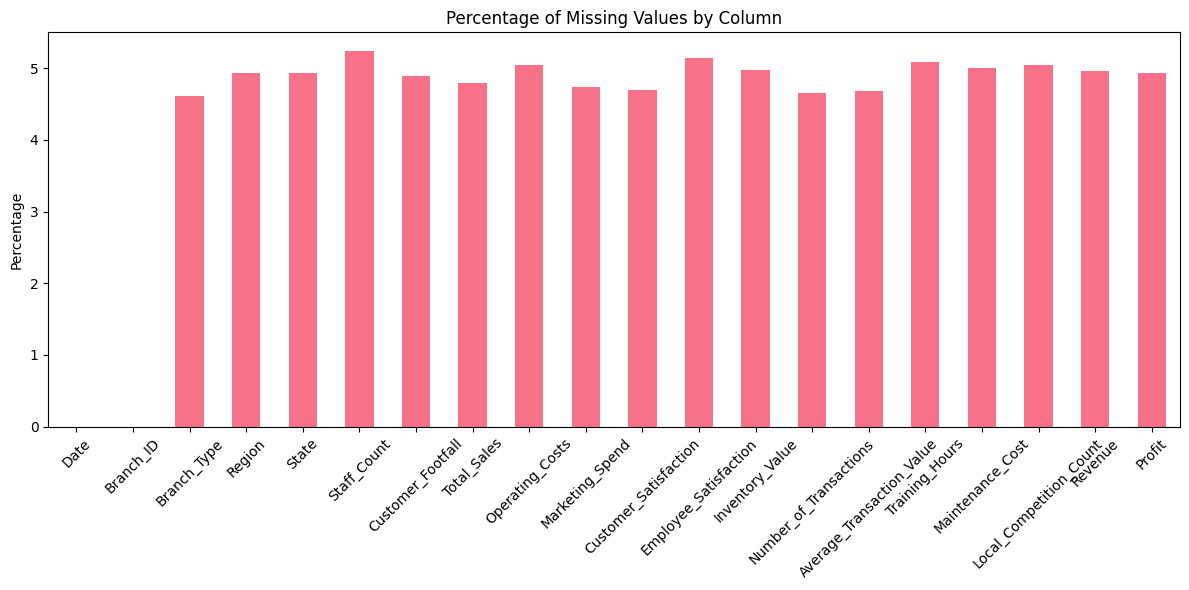

In [5]:
## 1.2 Missing Values Analysis
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xticks(rotation=45)
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

**Univariate Analysis**

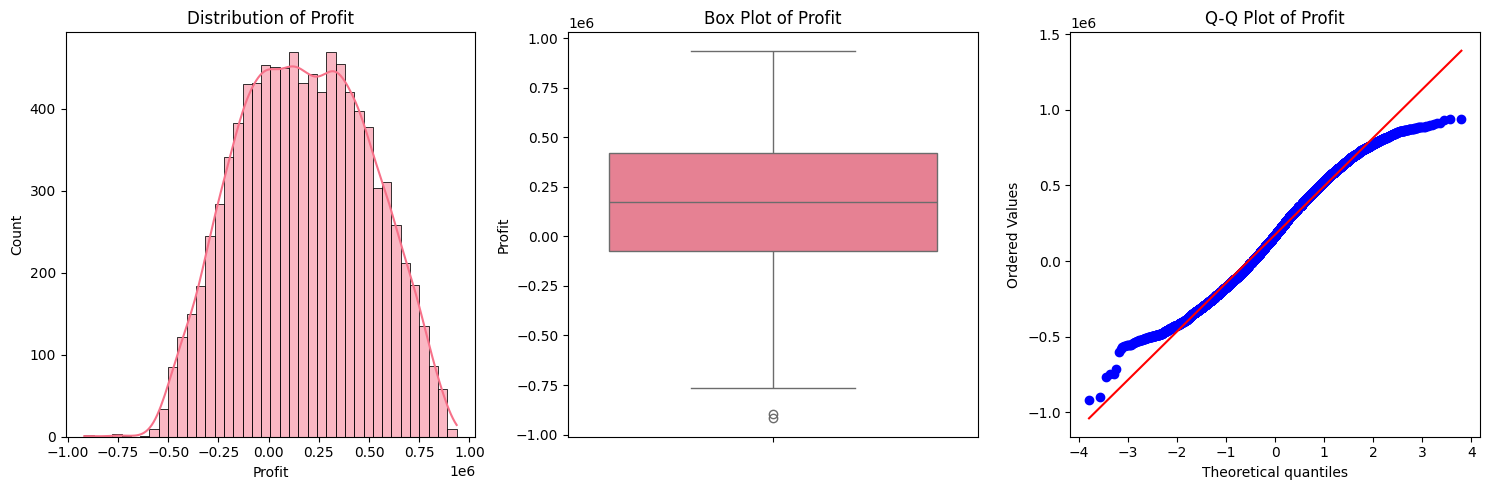


Statistical Summary for Profit:
       Metric         Value
         Mean 175737.343387
       Median 172933.344842
      Std Dev 321550.976312
     Skewness      0.007730
     Kurtosis     -0.765412
          IQR 495259.231123
    % Missing      4.930000
Unique Values   9507.000000

Number of outliers detected: 2 (0.02%)


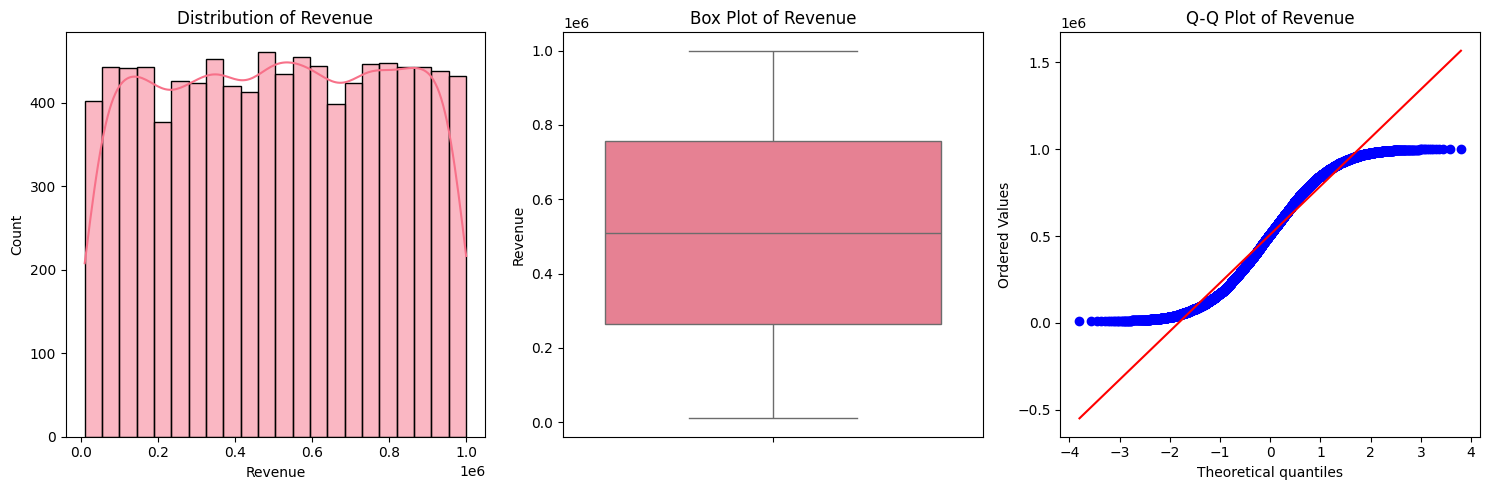


Statistical Summary for Revenue:
       Metric         Value
         Mean 508516.213493
       Median 510389.204545
      Std Dev 285078.544456
     Skewness     -0.016053
     Kurtosis     -1.195642
          IQR 492175.846050
    % Missing      4.960000
Unique Values   9504.000000

Number of outliers detected: 0 (0.00%)


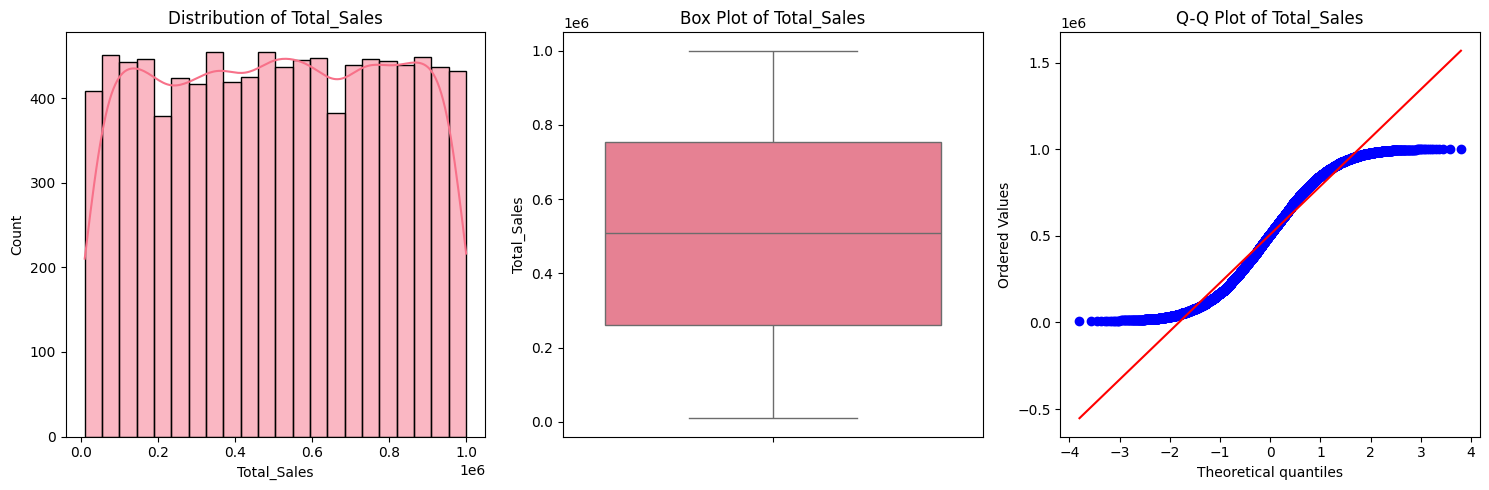


Statistical Summary for Total_Sales:
       Metric         Value
         Mean 507838.295425
       Median 508376.324682
      Std Dev 285514.843953
     Skewness     -0.014453
     Kurtosis     -1.199240
          IQR 494104.516926
    % Missing      4.790000
Unique Values   9521.000000

Number of outliers detected: 0 (0.00%)


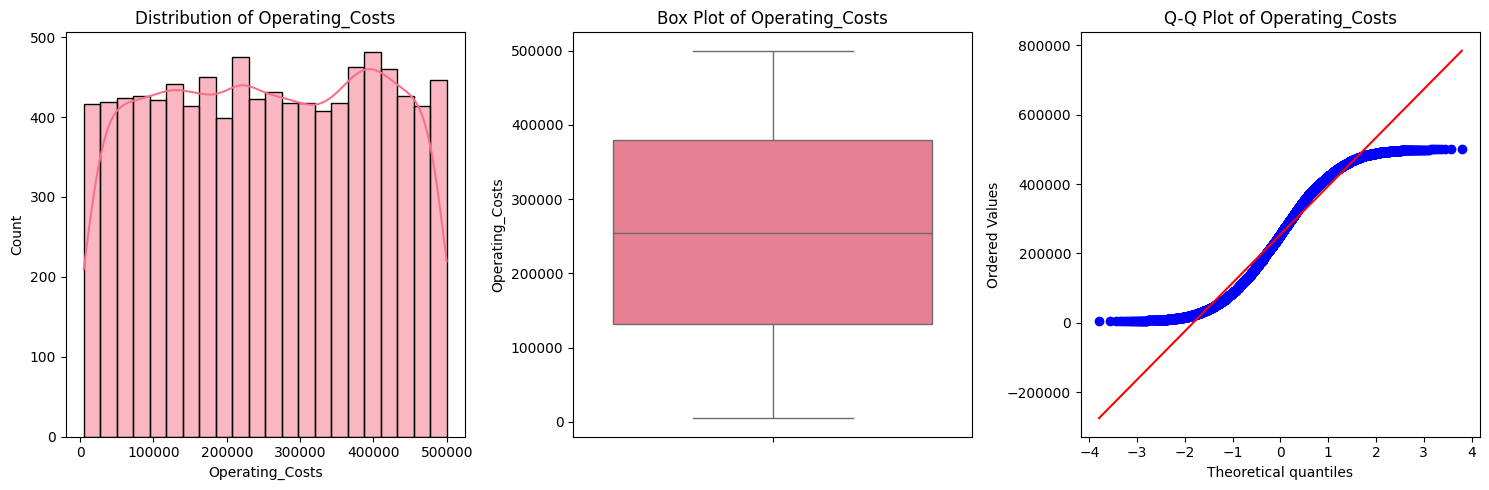


Statistical Summary for Operating_Costs:
       Metric         Value
         Mean 254588.445315
       Median 254332.851328
      Std Dev 142807.851032
     Skewness     -0.016837
     Kurtosis     -1.204636
          IQR 248267.693315
    % Missing      5.040000
Unique Values   9496.000000

Number of outliers detected: 0 (0.00%)


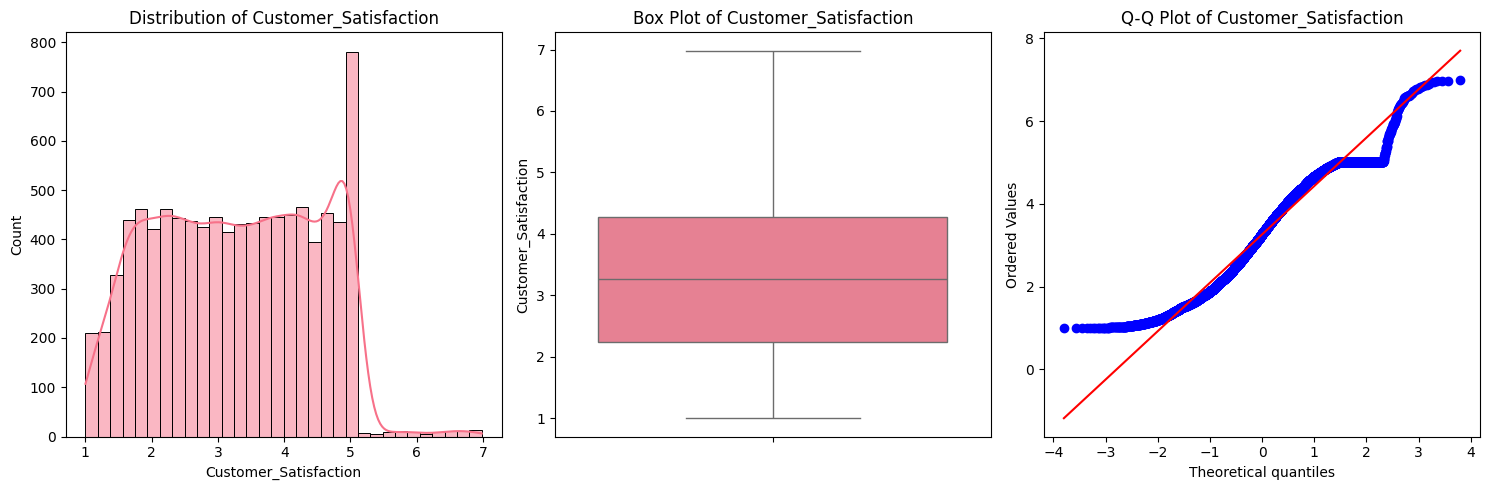


Statistical Summary for Customer_Satisfaction:
       Metric       Value
         Mean    3.260210
       Median    3.270309
      Std Dev    1.189284
     Skewness    0.025805
     Kurtosis   -0.972784
          IQR    2.028453
    % Missing    4.700000
Unique Values 8940.000000

Number of outliers detected: 0 (0.00%)


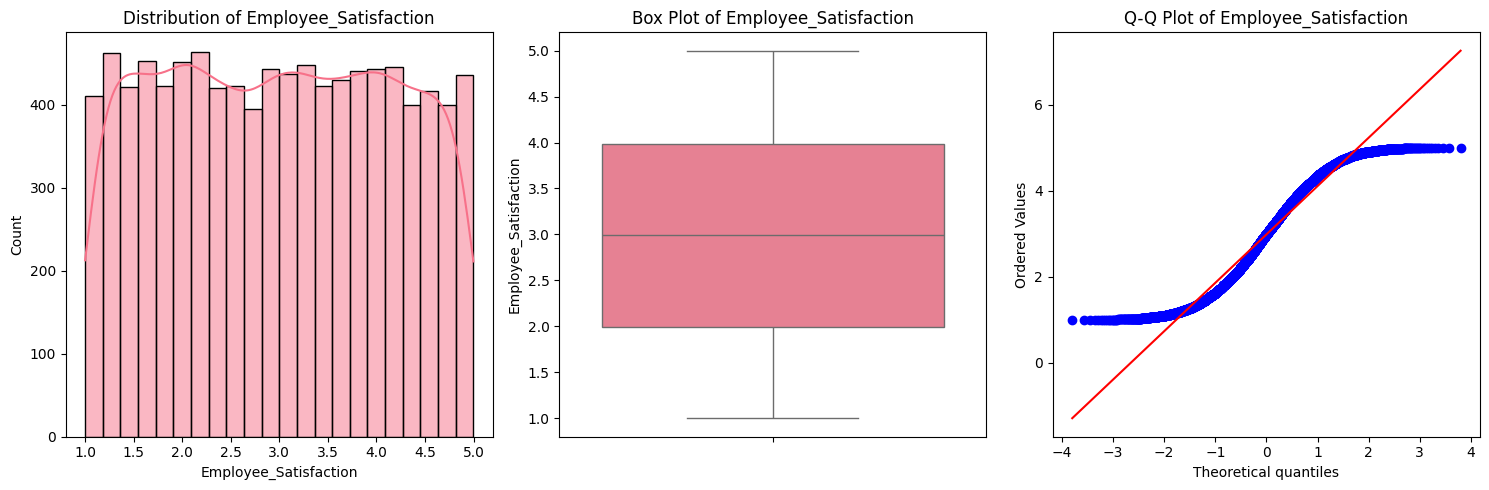


Statistical Summary for Employee_Satisfaction:
       Metric       Value
         Mean    2.987775
       Median    2.991363
      Std Dev    1.150669
     Skewness    0.012815
     Kurtosis   -1.199649
          IQR    1.987720
    % Missing    5.150000
Unique Values 9485.000000

Number of outliers detected: 0 (0.00%)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')





## 1.1 Numerical Variables Analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def analyze_numerical_variable(data, column):
    """Detailed analysis of numerical variables"""
    plt.figure(figsize=(15, 5))
    
    # Distribution plot
    plt.subplot(1, 3, 1)
    sns.histplot(data=data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    
    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
    
    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(data[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    stats_summary = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Skewness', 'Kurtosis', 
                  'IQR', '% Missing', 'Unique Values'],
        'Value': [
            data[column].mean(),
            data[column].median(),
            data[column].std(),
            data[column].skew(),
            data[column].kurtosis(),
            data[column].quantile(0.75) - data[column].quantile(0.25),
            (data[column].isnull().sum() / len(data)) * 100,
            data[column].nunique()
        ]
    })
    
    print(f"\nStatistical Summary for {column}:")
    print(stats_summary.to_string(index=False))
    
    # Detect outliers using IQR method
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))).sum()
    print(f"\nNumber of outliers detected: {outliers} ({(outliers/len(data)*100):.2f}%)")

# Analyze key numerical variables
key_numericals = ['Profit', 'Revenue', 'Total_Sales', 'Operating_Costs', 
                 'Customer_Satisfaction', 'Employee_Satisfaction']
for col in key_numericals:
    analyze_numerical_variable(df, col)

**Bivariate Analysis**

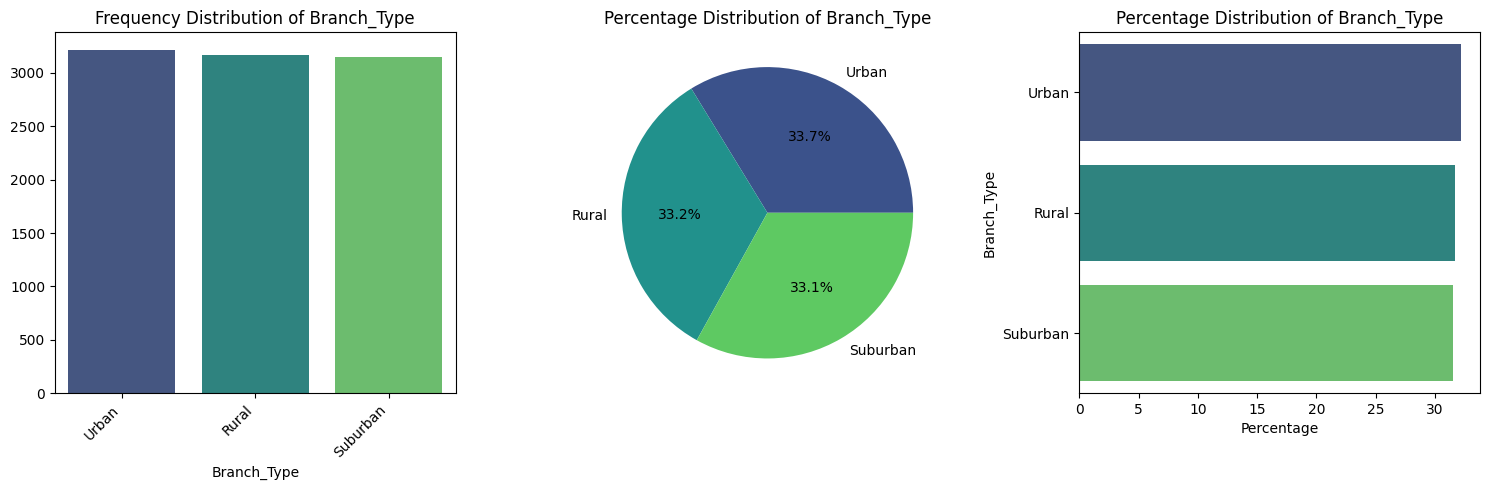


Statistical Summary for Branch_Type:
        Metric     Value
 Unique Values         3
          Mode     Urban
Mode Frequency      3219
     % Missing      4.62
       Entropy  1.098572


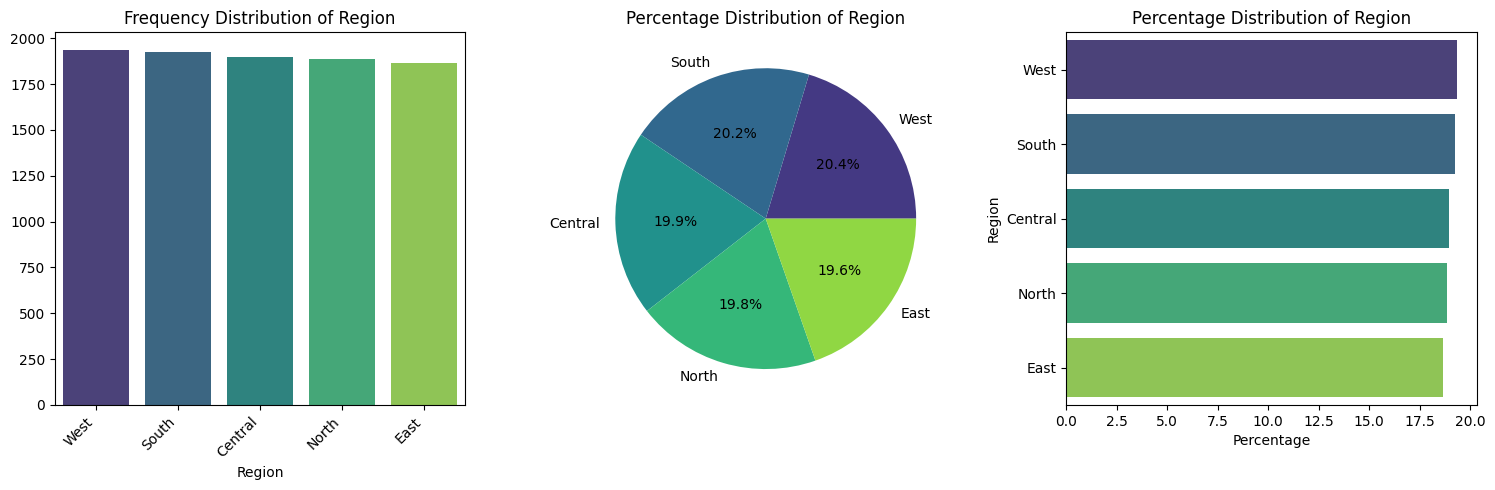


Statistical Summary for Region:
        Metric     Value
 Unique Values         5
          Mode      West
Mode Frequency      1935
     % Missing      4.94
       Entropy  1.609353


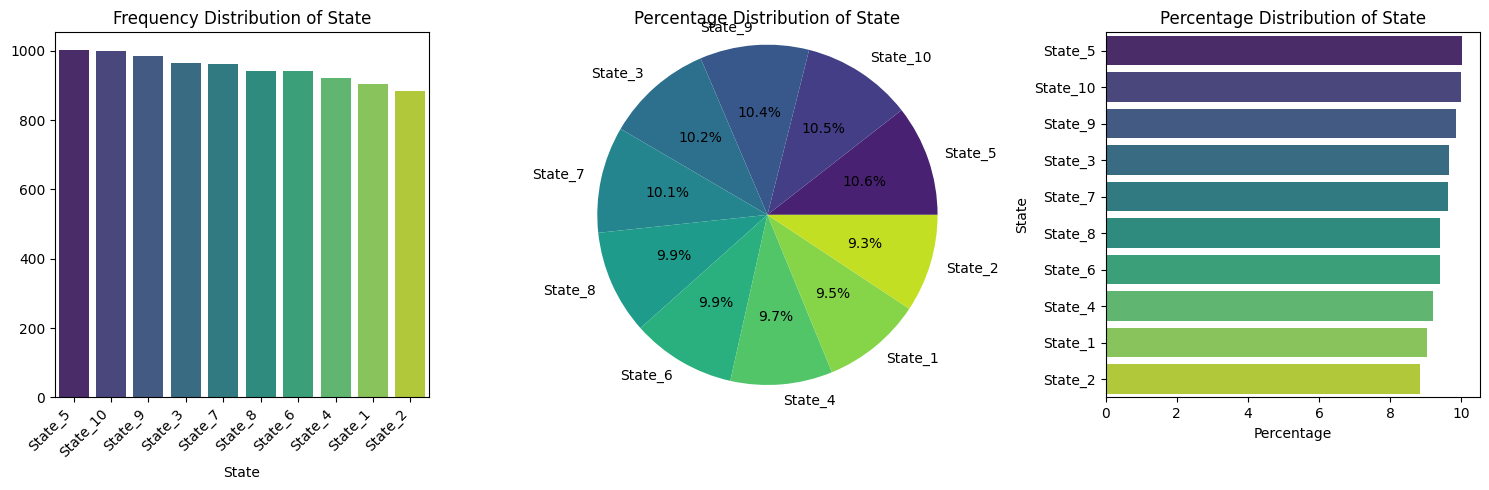


Statistical Summary for State:
        Metric     Value
 Unique Values        10
          Mode   State_5
Mode Frequency      1003
     % Missing      4.93
       Entropy  2.301799


In [ ]:

exclude_cols = ['Date', 'Branch_ID']
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col not in exclude_cols]

def analyze_categorical_variable(data, column):
    """Detailed analysis of categorical variables"""
    plt.figure(figsize=(15, 5))
    
    # Bar plot
    plt.subplot(1, 3, 1)
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Frequency Distribution of {column}')
    plt.xticks(rotation=45, ha='right')
    
    # Pie chart
    plt.subplot(1, 3, 2)
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(value_counts)))
    plt.title(f'Percentage Distribution of {column}')
    plt.axis('equal')
    
    # Horizontal bar plot with percentages
    plt.subplot(1, 3, 3)
    percentages = (value_counts / len(data) * 100)
    sns.barplot(x=percentages.values, y=percentages.index, palette='viridis')
    plt.title(f'Percentage Distribution of {column}')
    plt.xlabel('Percentage')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical summary
    stats_summary = pd.DataFrame({
        'Metric': ['Unique Values', 'Mode', 'Mode Frequency', '% Missing', 'Entropy'],
        'Value': [
            data[column].nunique(),
            data[column].mode()[0],
            data[column].value_counts().iloc[0],
            (data[column].isnull().sum() / len(data)) * 100,
            stats.entropy(data[column].value_counts(normalize=True))
        ]
    })
    
    print(f"\nStatistical Summary for {column}:")
    print(stats_summary.to_string(index=False))

# Analyze categorical variables excluding specified columns
for col in categorical_cols:
    analyze_categorical_variable(df, col)


**Correlation Analysis**


Complete Correlation Analysis with Significance Testing:
                                                Correlation       P-value
Profit vs Profit                                   1.000000  0.000000e+00
Profit vs Revenue                                  0.871775  0.000000e+00
Profit vs Total_Sales                              0.873570  0.000000e+00
Profit vs Operating_Costs                         -0.440264  0.000000e+00
Profit vs Customer_Satisfaction                    0.173310  4.289188e-62
Revenue vs Profit                                  0.871775  0.000000e+00
Revenue vs Revenue                                 1.000000  0.000000e+00
Revenue vs Total_Sales                             1.000000  0.000000e+00
Revenue vs Operating_Costs                        -0.009267  3.785527e-01
Revenue vs Customer_Satisfaction                   0.159814  6.835320e-53
Total_Sales vs Profit                              0.873570  0.000000e+00
Total_Sales vs Revenue                             1.0

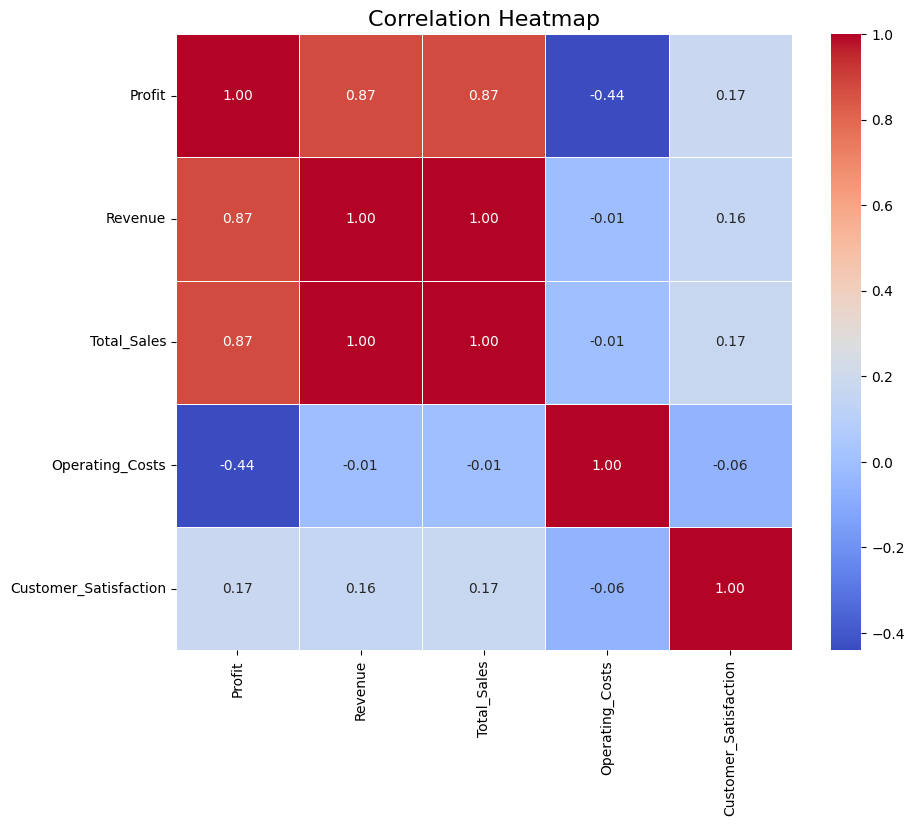

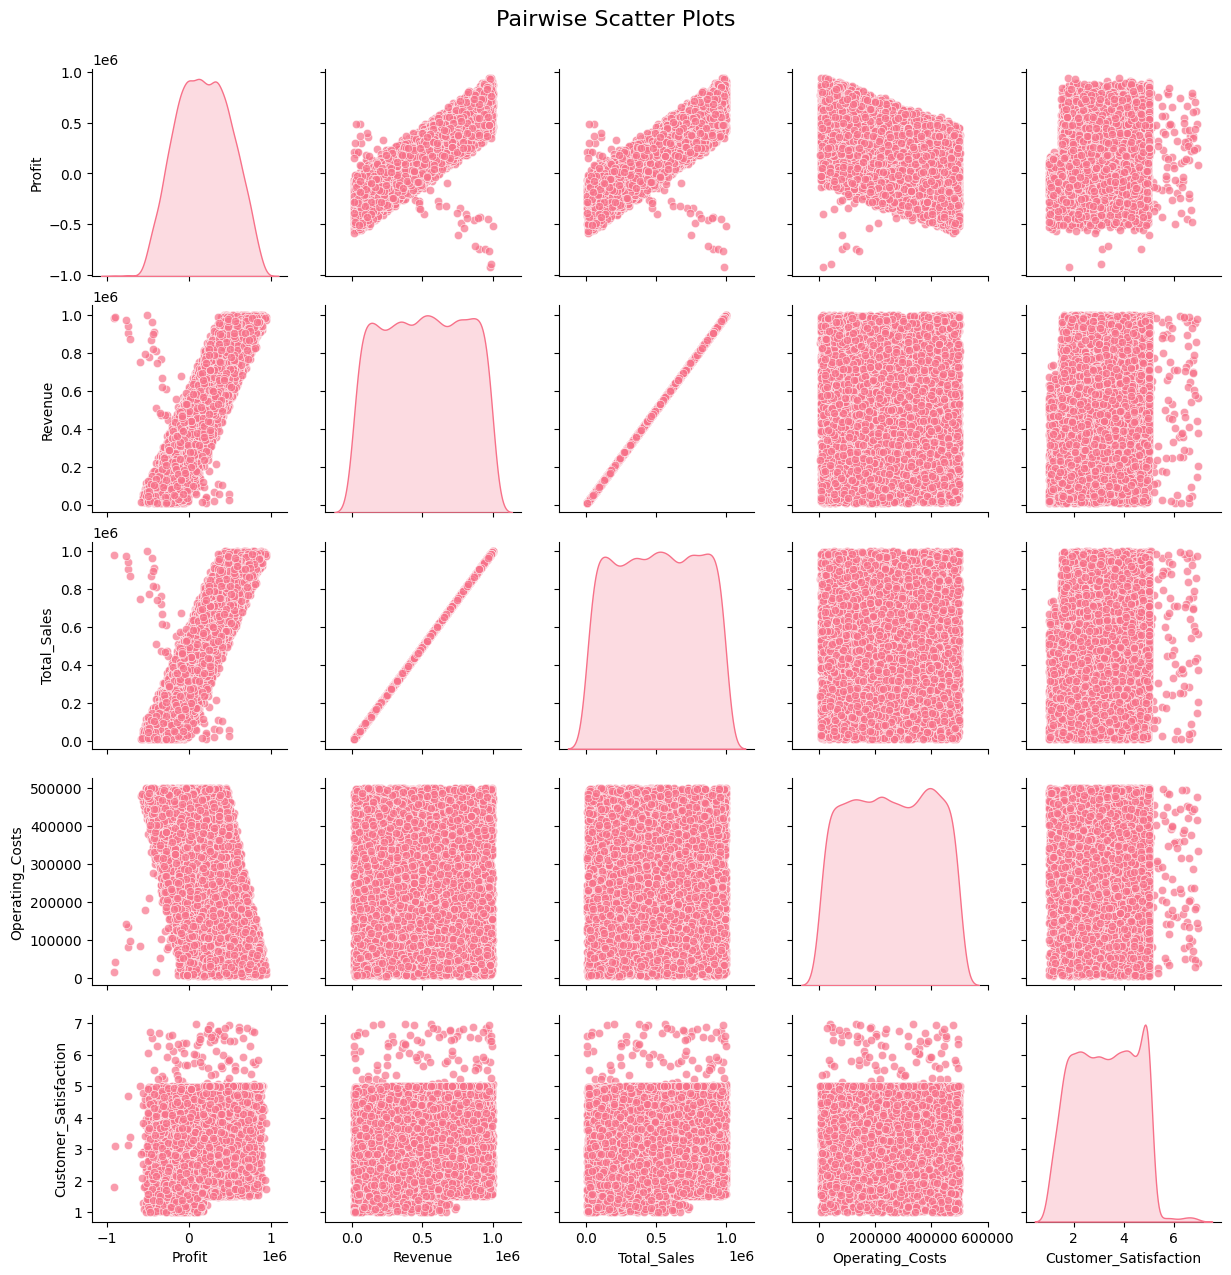

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

def correlation_analysis(data, columns):
    correlations = {}
    correlation_matrix = pd.DataFrame(index=columns, columns=columns)
    p_value_matrix = pd.DataFrame(index=columns, columns=columns)
    
    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                # Set correlation to 1 for self-correlation
                corr = 1.0
                p_value = 0.0  # P-value is not meaningful for self-correlation
            else:
                common_data = data[[col1, col2]].dropna()
                corr, p_value = stats.pearsonr(common_data[col1], common_data[col2])
            
            correlations[f"{col1} vs {col2}"] = {
                'Correlation': corr,
                'P-value': p_value
            }
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = p_value
    
    # Convert to numeric for the heatmap
    correlation_matrix = correlation_matrix.astype(float)
    return pd.DataFrame(correlations).T, correlation_matrix, p_value_matrix

def plot_correlation_heatmap(correlation_matrix, title="Correlation Heatmap"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)
    plt.title(title, fontsize=16)
    plt.show()

def plot_pairwise_scatter(data, columns):
    sns.pairplot(data[columns], diag_kind='kde', plot_kws={'alpha': 0.7})
    plt.suptitle("Pairwise Scatter Plots", y=1.02, fontsize=16)
    plt.show()

# Key metrics to analyze
key_metrics = ['Profit', 'Revenue', 'Total_Sales', 'Operating_Costs', 'Customer_Satisfaction']

# Perform correlation analysis
corr_analysis, corr_matrix, p_values = correlation_analysis(df, key_metrics)

# Display correlation analysis table
print("\nComplete Correlation Analysis with Significance Testing:")
print(corr_analysis)

# Plot the correlation heatmap
plot_correlation_heatmap(corr_matrix)

# Plot pairwise scatter plots for a complete visual analysis
plot_pairwise_scatter(df, key_metrics)


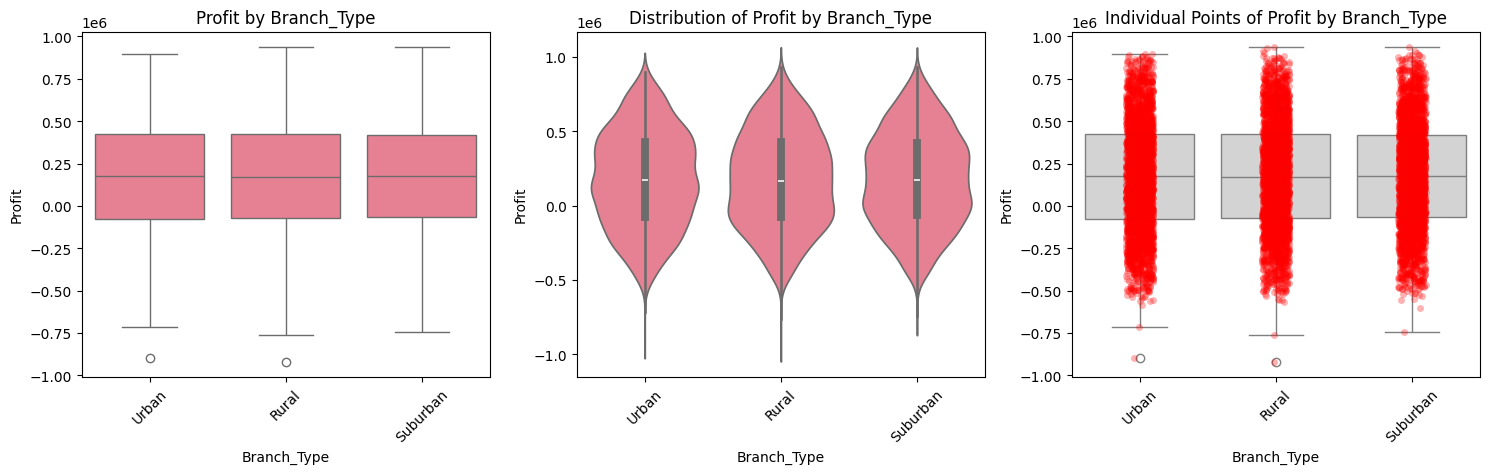


ANOVA Test Results for Profit by Branch_Type:
F-statistic: 0.0868
P-value: 0.9168

Descriptive Statistics by Category:
              count           mean            std            min  \
Branch_Type                                                        
Rural        3005.0  174590.019960  322741.282198 -918189.366968   
Suburban     2998.0  178053.272113  318348.383753 -743196.998964   
Urban        3067.0  176363.652383  324793.511398 -896257.260133   

                      25%            50%            75%            max  
Branch_Type                                                             
Rural       -73034.591478  168770.991760  425705.163731  936484.218586  
Suburban    -64440.636341  174292.723183  420181.730776  936472.341518  
Urban       -75594.920225  174627.820337  426573.908271  898166.915793  


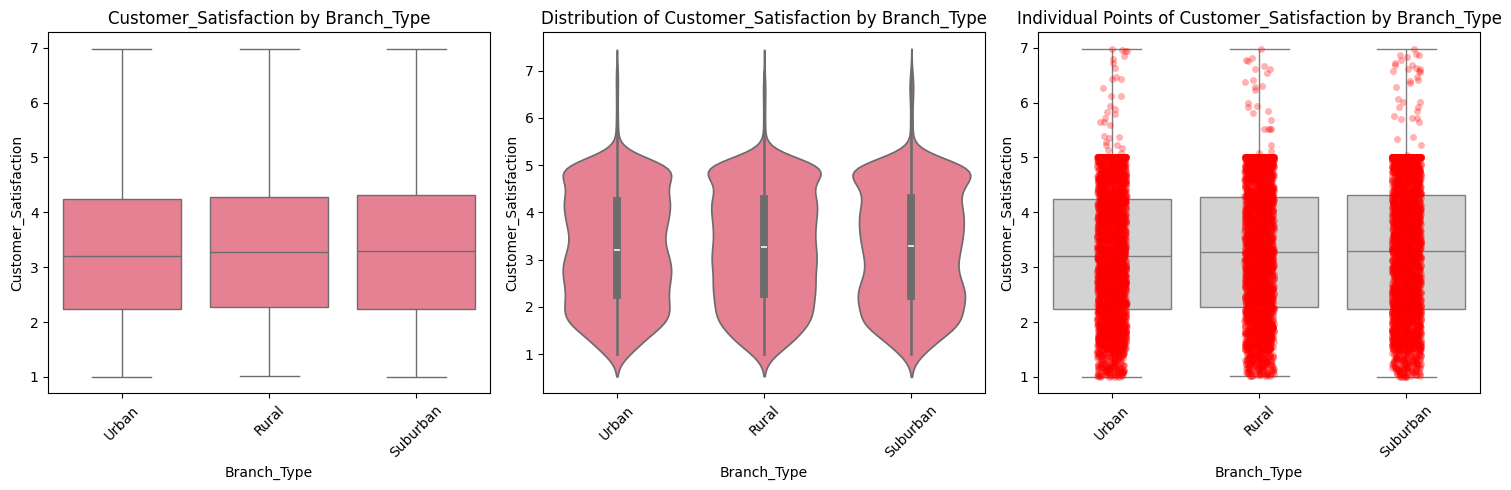


ANOVA Test Results for Customer_Satisfaction by Branch_Type:
F-statistic: 0.7452
P-value: 0.4747

Descriptive Statistics by Category:
              count      mean       std       min       25%       50%  \
Branch_Type                                                             
Rural        3028.0  3.267569  1.185355  1.008137  2.270480  3.274644   
Suburban     2990.0  3.271538  1.204027  1.003493  2.230042  3.297188   
Urban        3081.0  3.237518  1.183130  1.001779  2.245502  3.210336   

                  75%       max  
Branch_Type                      
Rural        4.279430  6.967783  
Suburban     4.312327  6.980377  
Urban        4.238267  6.969951  


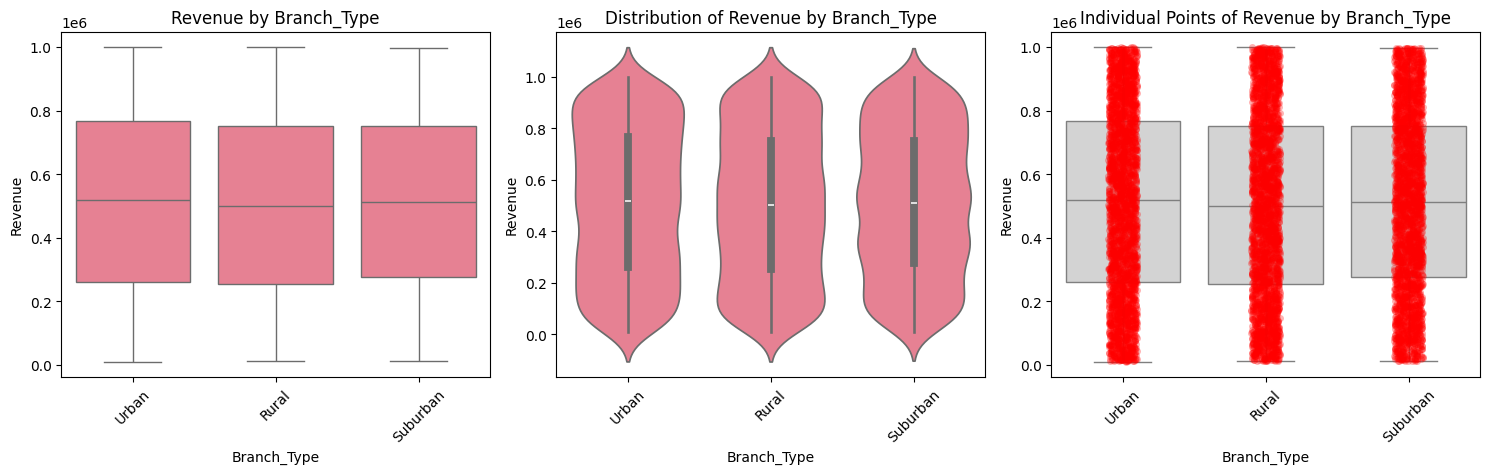


ANOVA Test Results for Revenue by Branch_Type:
F-statistic: 0.8127
P-value: 0.4437

Descriptive Statistics by Category:
              count           mean            std           min  \
Branch_Type                                                       
Rural        3008.0  503188.521124  288297.611032  10317.618815   
Suburban     2973.0  509863.138686  279625.838069  10401.301638   
Urban        3077.0  512199.928695  288330.139356  10092.335341   

                       25%            50%            75%            max  
Branch_Type                                                              
Rural        253734.874835  500751.253121  750192.489189  999304.691745  
Suburban     276651.483662  512006.246469  750611.882766  998705.559820  
Urban        260749.233901  518170.866565  767869.315729  999799.141684  


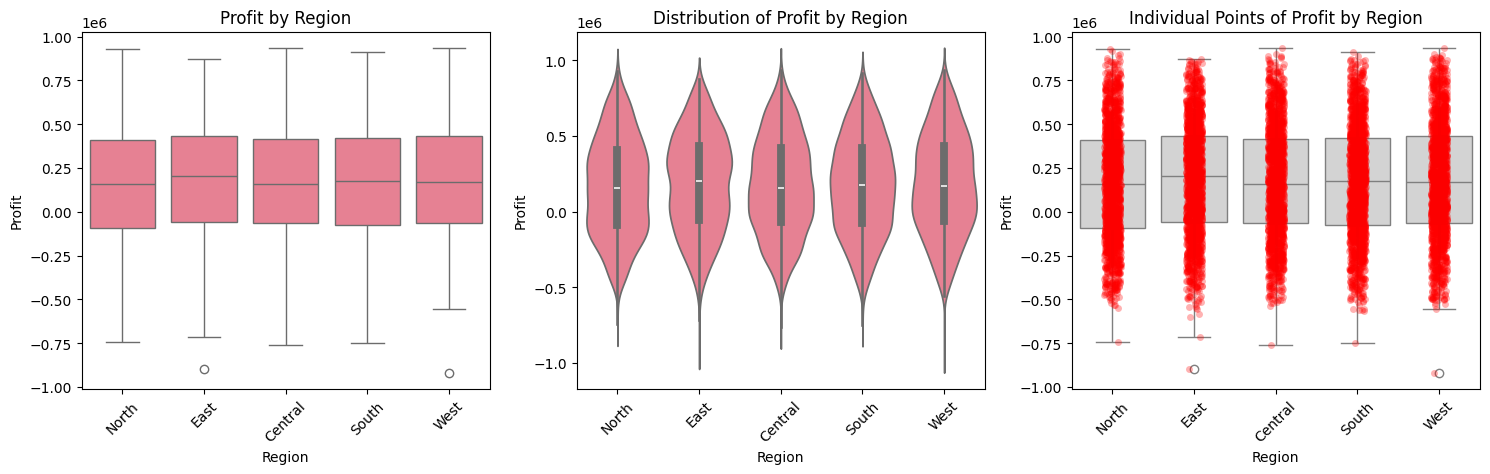


ANOVA Test Results for Profit by Region:
F-statistic: 1.4540
P-value: 0.2134

Descriptive Statistics by Category:
          count           mean            std            min           25%  \
Region                                                                       
Central  1808.0  171343.929399  319379.224476 -762751.698263 -66163.280722   
East     1781.0  187146.870601  319905.941558 -896257.260133 -55711.246725   
North    1800.0  164030.326385  321666.968269 -743196.998964 -90609.806172   
South    1819.0  171761.547269  319225.599313 -747220.516821 -77133.061463   
West     1825.0  181578.776476  327499.057506 -918189.366968 -62915.771195   

                   50%            75%            max  
Region                                                
Central  157930.312122  417208.441647  936484.218586  
East     202317.294858  435194.462171  873509.152068  
North    157611.988613  407982.660177  930521.350867  
South    173520.176013  419948.796803  912984.861044  
West    

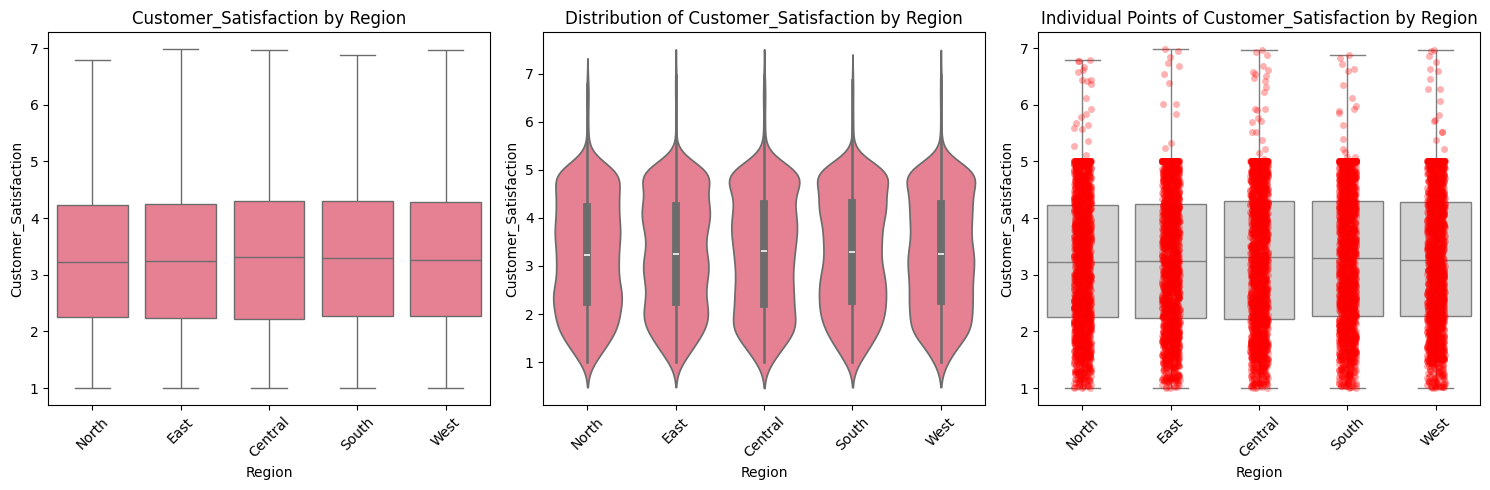


ANOVA Test Results for Customer_Satisfaction by Region:
F-statistic: 0.4971
P-value: 0.7379

Descriptive Statistics by Category:
          count      mean       std       min       25%       50%       75%  \
Region                                                                        
Central  1810.0  3.272905  1.214472  1.001779  2.216829  3.314208  4.296582   
East     1791.0  3.258999  1.178193  1.006182  2.244498  3.248648  4.253438   
North    1797.0  3.229300  1.178775  1.003242  2.249478  3.230595  4.232462   
South    1825.0  3.280693  1.188525  1.004487  2.279887  3.299840  4.302359   
West     1839.0  3.265366  1.182766  1.005517  2.265844  3.253601  4.290358   

              max  
Region             
Central  6.967783  
East     6.980377  
North    6.794646  
South    6.872378  
West     6.969951  


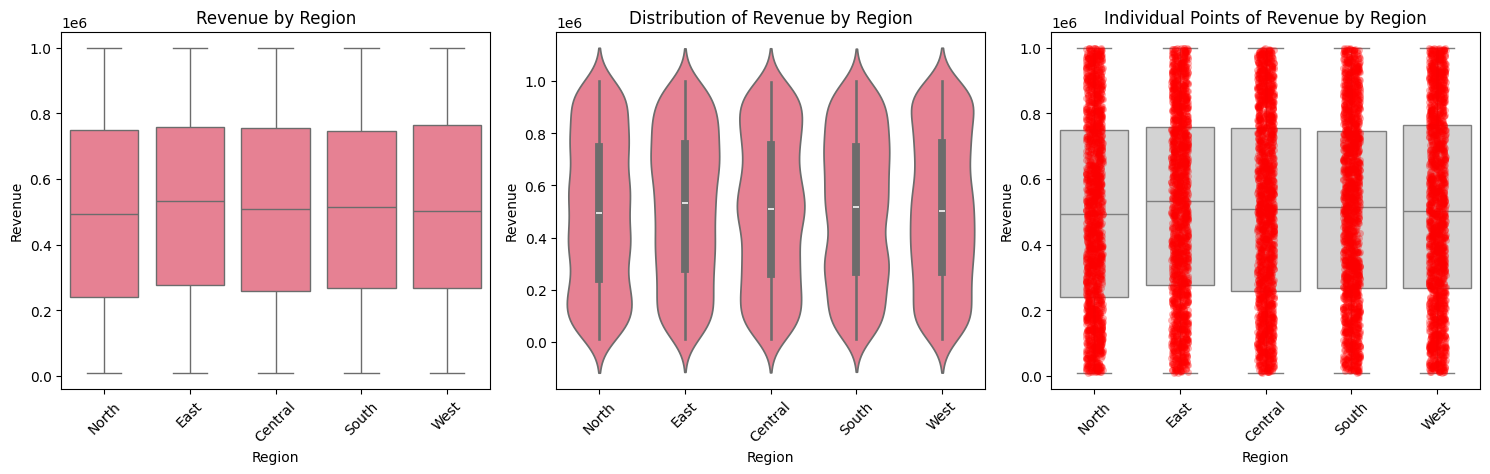


ANOVA Test Results for Revenue by Region:
F-statistic: 1.4920
P-value: 0.2016

Descriptive Statistics by Category:
          count           mean            std           min            25%  \
Region                                                                       
Central  1798.0  507000.677372  285080.073374  10092.335341  259764.243300   
East     1786.0  519447.544302  281236.807986  10317.618815  278190.622025   
North    1788.0  496404.893507  288417.299415  10523.248594  240849.317886   
South    1816.0  509245.716561  280753.578441  10311.307434  268848.383799   
West     1845.0  509978.302072  289173.386630  10401.301638  267533.060795   

                   50%            75%            max  
Region                                                
Central  508903.701461  756433.371834  998518.082454  
East     533274.384584  759395.574440  999799.141684  
North    493943.248232  749060.601484  998851.409600  
South    515232.883642  746823.116285  999155.278180  
West   

In [ ]:
# Categorical vs Numerical Analysis

def analyze_cat_num_relationship(data, cat_col, num_col):
    """Analyze relationship between categorical and numerical variables"""
    plt.figure(figsize=(15, 5))
    
    # Box plot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=data[cat_col], y=data[num_col])
    plt.title(f'{num_col} by {cat_col}')
    plt.xticks(rotation=45)
    
    # Violin plot
    plt.subplot(1, 3, 2)
    sns.violinplot(x=data[cat_col], y=data[num_col])
    plt.title(f'Distribution of {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    
    # Strip plot with box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[cat_col], y=data[num_col], color='lightgray')
    sns.stripplot(x=data[cat_col], y=data[num_col], color='red', alpha=0.3)
    plt.title(f'Individual Points of {num_col} by {cat_col}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # ANOVA test
    categories = data[cat_col].unique()
    category_groups = [group[num_col].dropna() for name, group in data.groupby(cat_col)]
    f_statistic, p_value = stats.f_oneway(*category_groups)
    
    print(f"\nANOVA Test Results for {num_col} by {cat_col}:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    # Descriptive statistics by category
    print("\nDescriptive Statistics by Category:")
    print(data.groupby(cat_col)[num_col].describe())

# Analyze relationships between categorical and key numerical variables
for cat_col in ['Branch_Type', 'Region']:
    for num_col in ['Profit', 'Customer_Satisfaction', 'Revenue']:
        analyze_cat_num_relationship(df, cat_col, num_col)

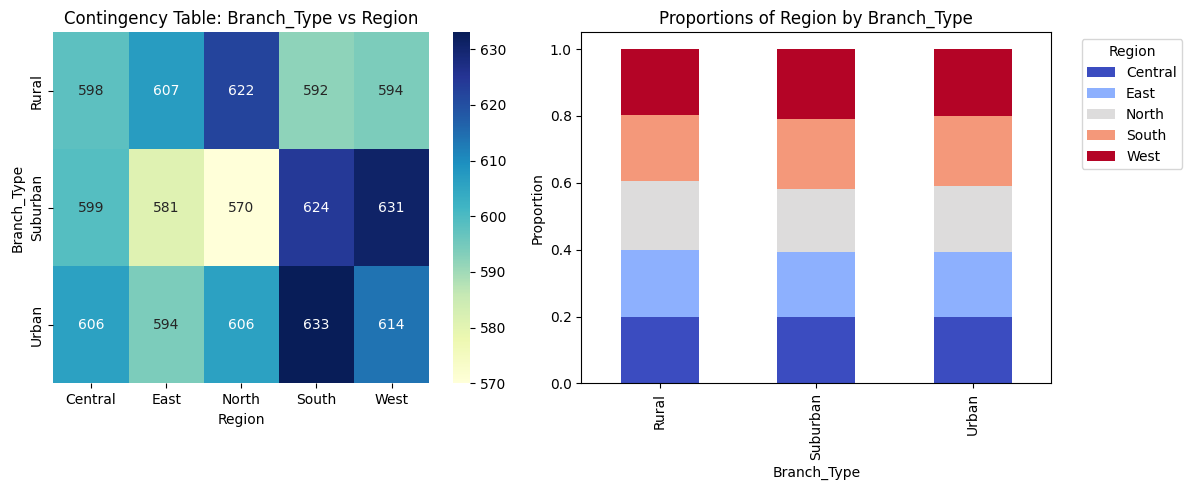


Chi-square Test Results for Branch_Type vs Region:
Chi-square statistic: 5.2083
P-value: 0.7351
Degrees of freedom: 8
Cramér's V: 0.0169


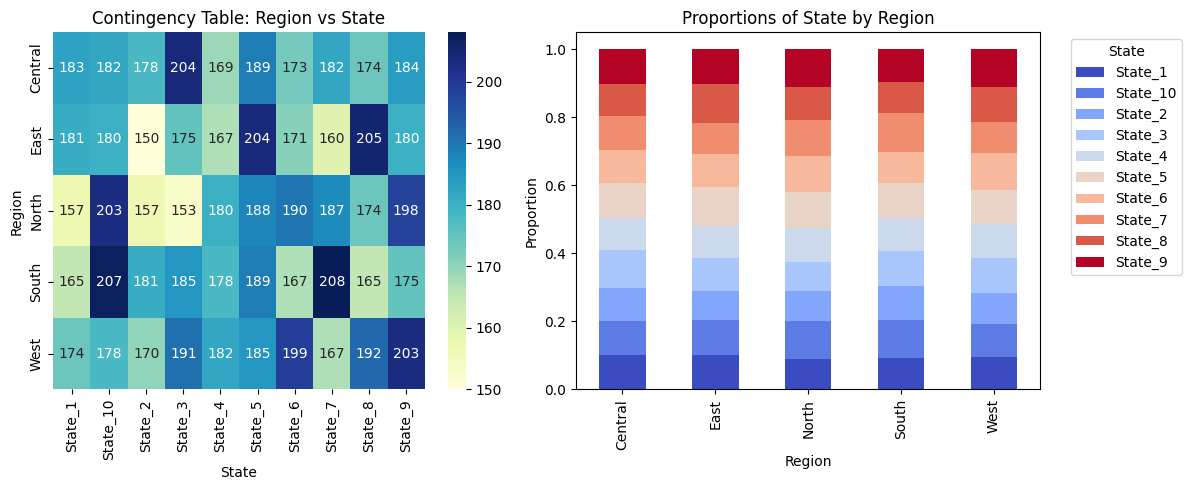


Chi-square Test Results for Region vs State:
Chi-square statistic: 40.5688
P-value: 0.2759
Degrees of freedom: 36
Cramér's V: 0.0335


In [10]:
def analyze_cat_cat_relationship(data, cat1, cat2):
    """Analyze relationship between two categorical variables."""
    # Create contingency table
    contingency_table = pd.crosstab(data[cat1], data[cat2])
    
    # Perform Chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    plt.figure(figsize=(12, 5))
    
    # Heatmap of contingency table
    plt.subplot(1, 2, 1)
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Contingency Table: {cat1} vs {cat2}')
    
    # Stacked bar plot for proportions
    plt.subplot(1, 2, 2)
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    proportions.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm')
    plt.title(f'Proportions of {cat2} by {cat1}')
    plt.xlabel(cat1)
    plt.ylabel('Proportion')
    plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
    
    # Print Chi-square test results
    print(f"\nChi-square Test Results for {cat1} vs {cat2}:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Degrees of freedom: {dof}")
    
    # Calculate and print Cramér's V
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v = np.sqrt(chi2 / (n * min_dim))
    print(f"Cramér's V: {cramer_v:.4f}")

# Analyze relationships between categorical variables
cat_pairs = [('Branch_Type', 'Region'), ('Region', 'State')]
for cat1, cat2 in cat_pairs:
    analyze_cat_cat_relationship(df, cat1, cat2)


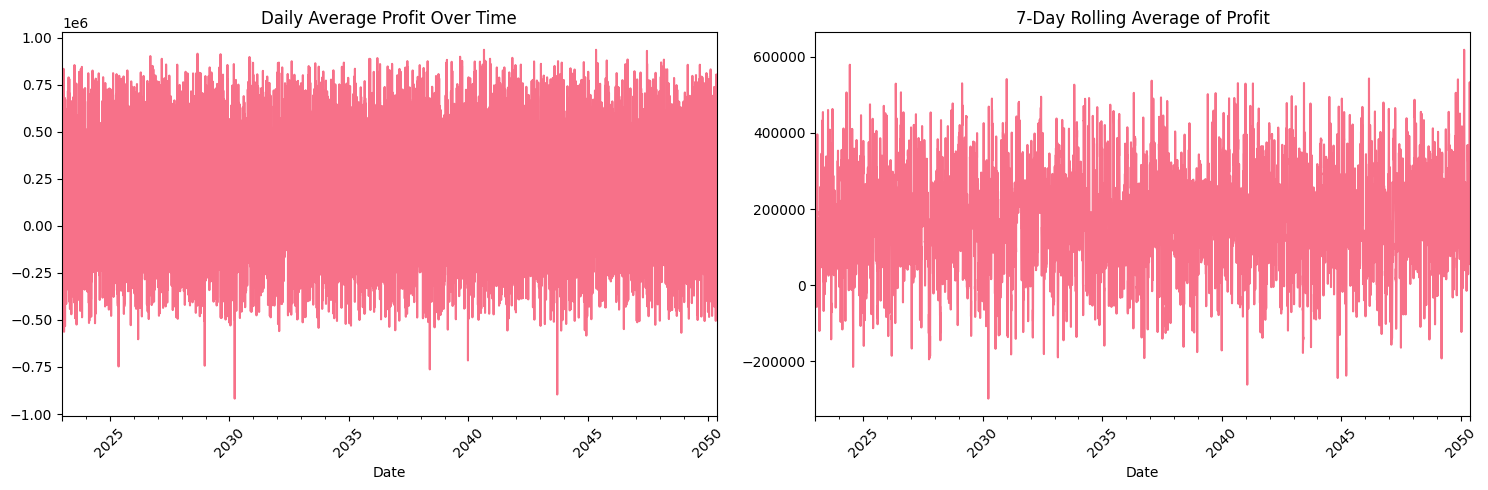

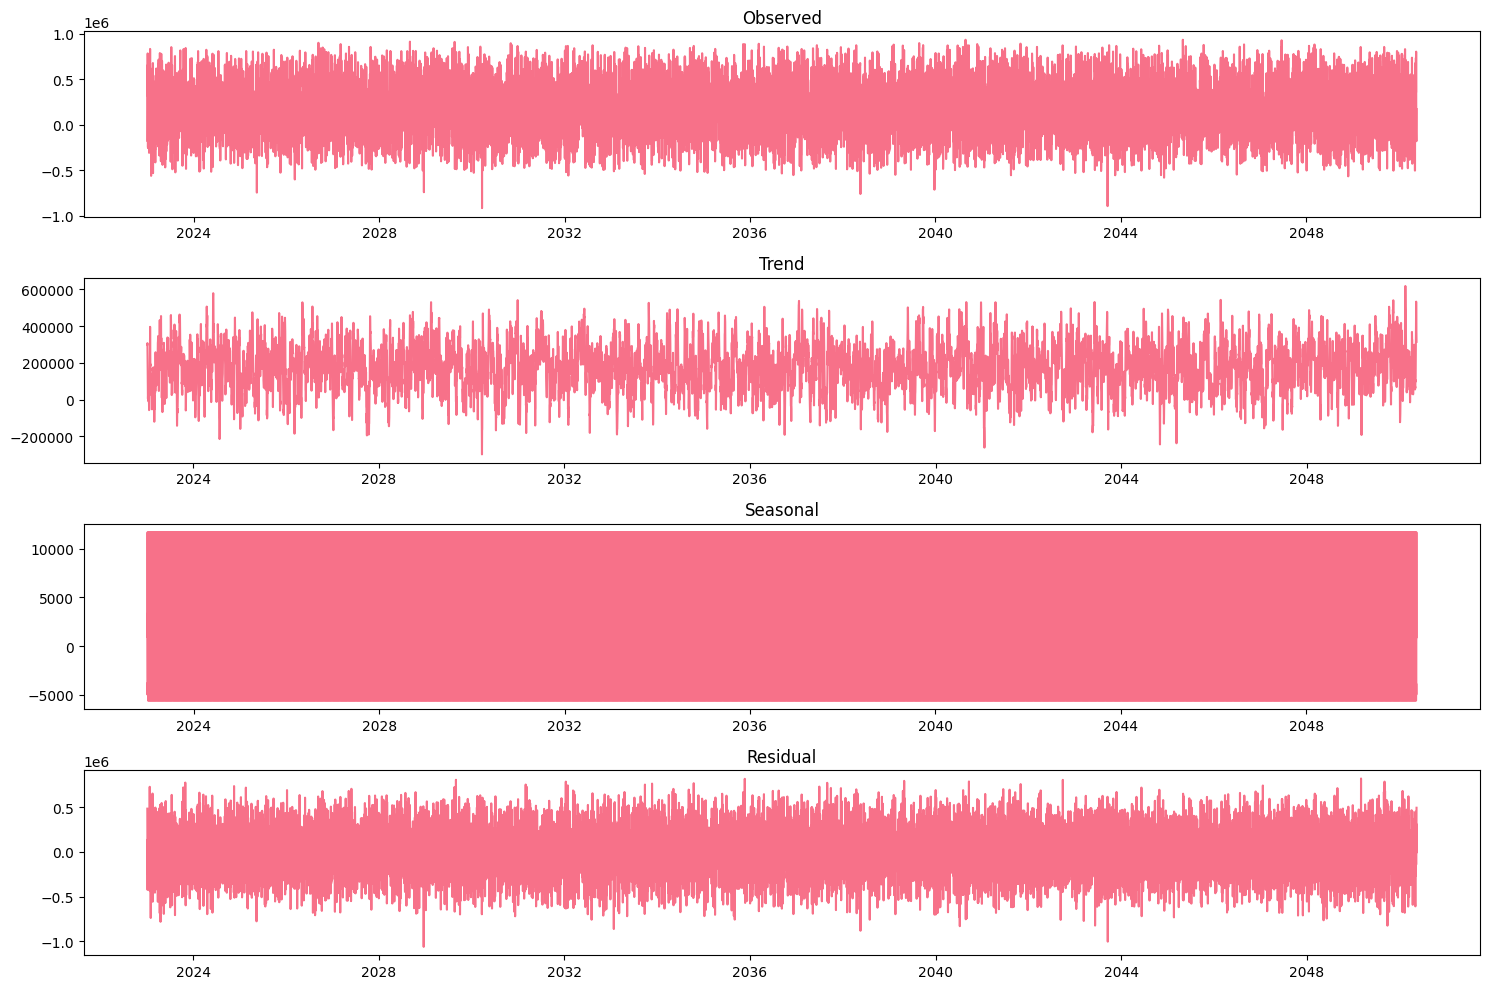

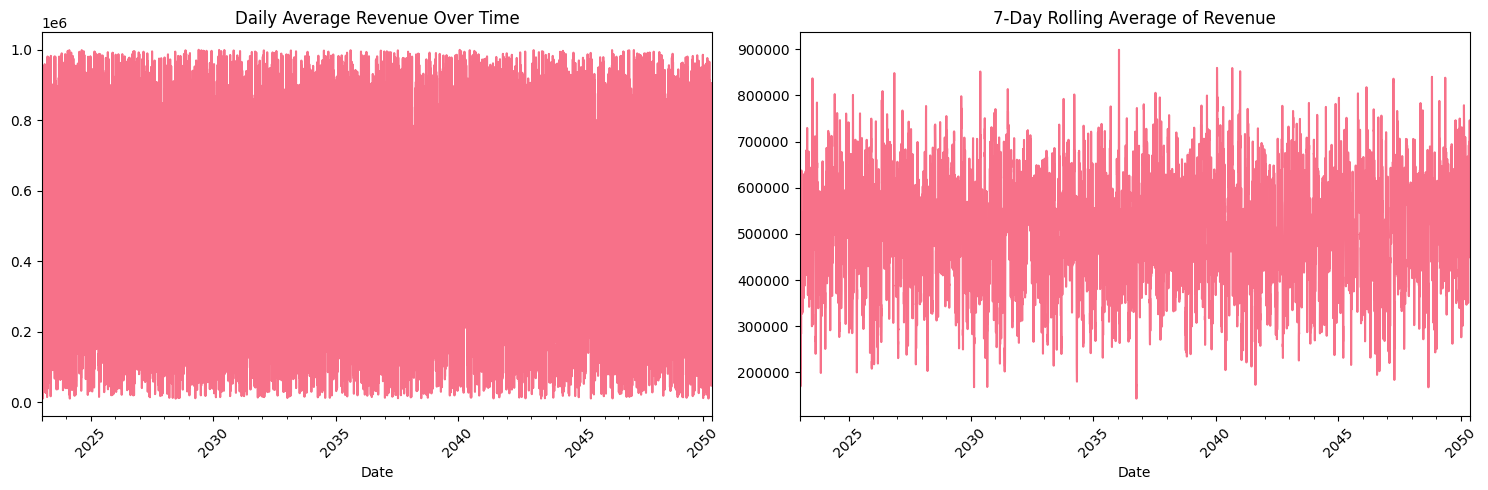

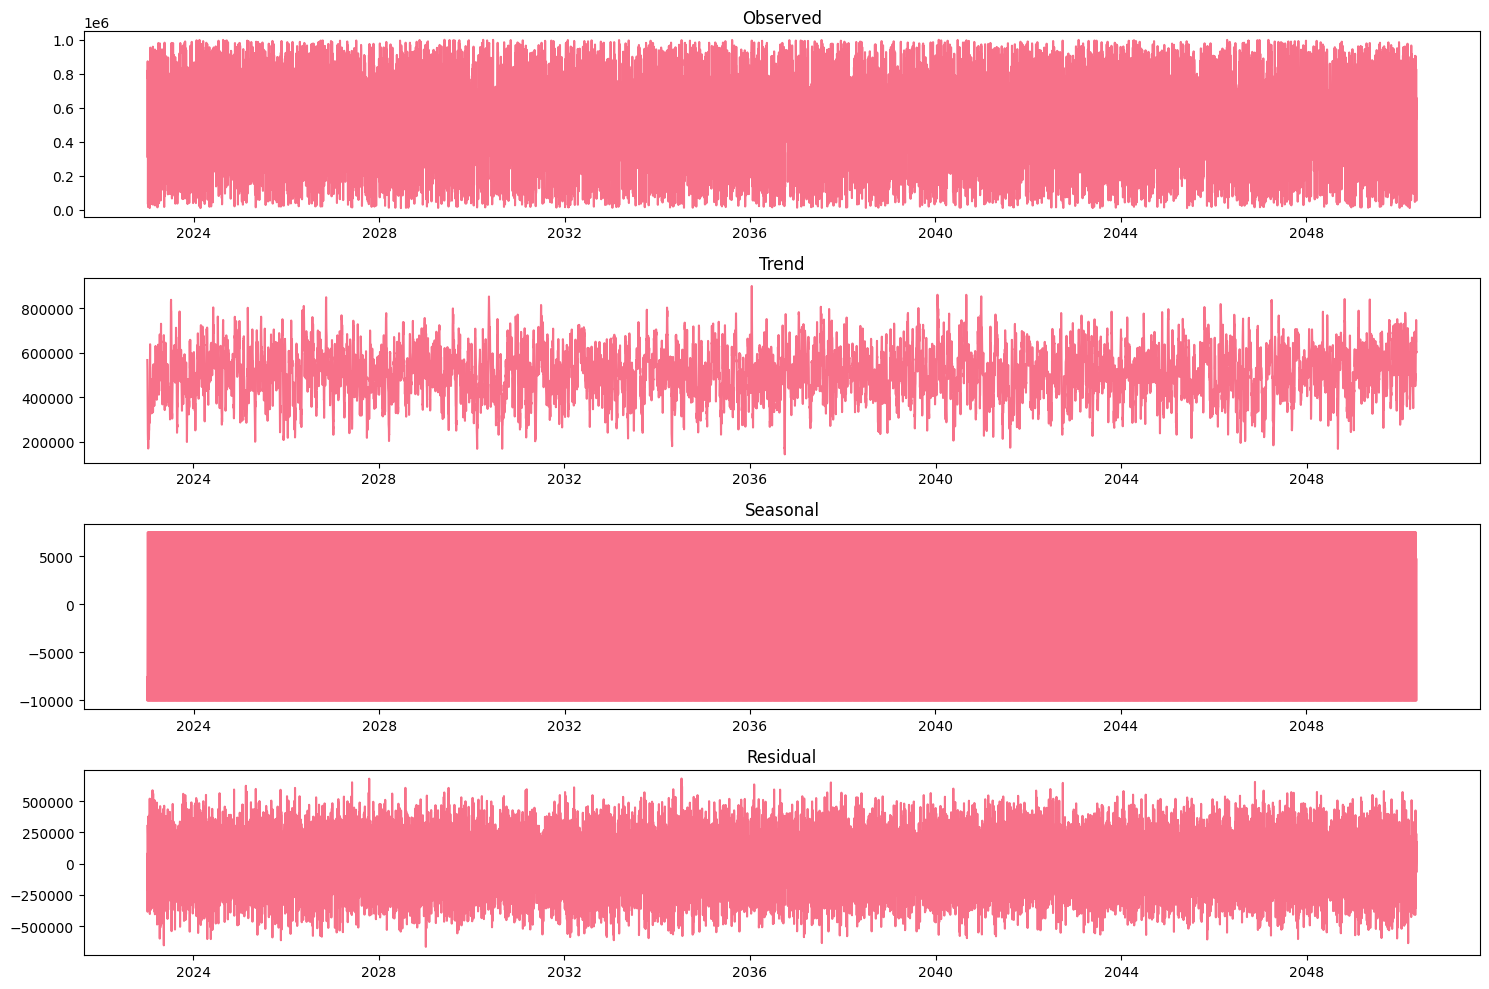

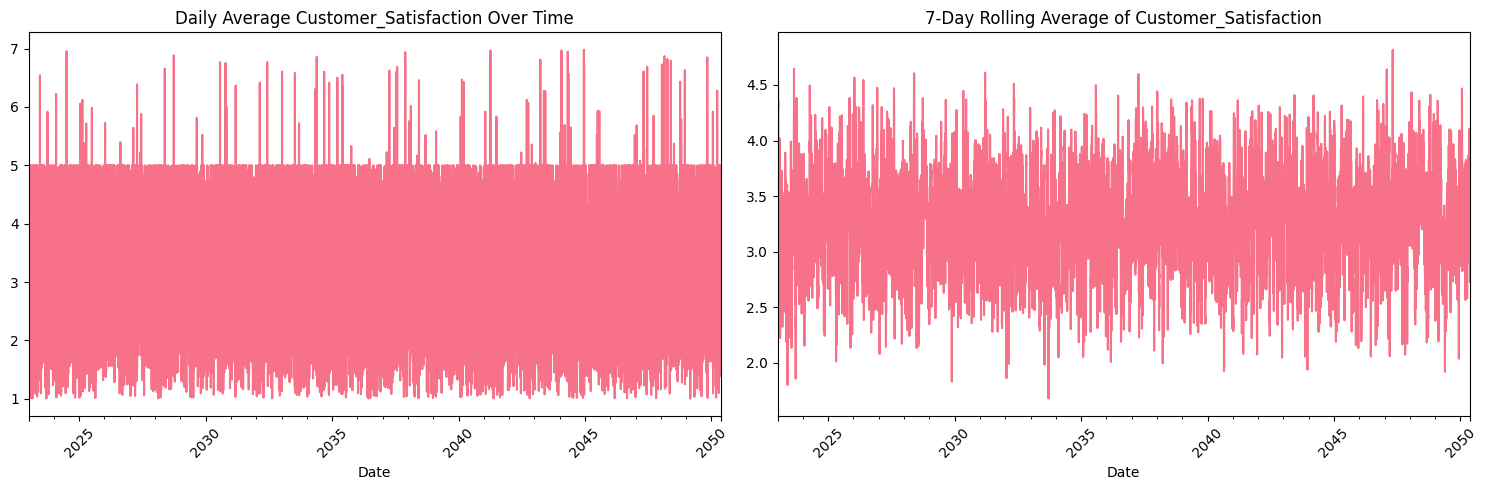

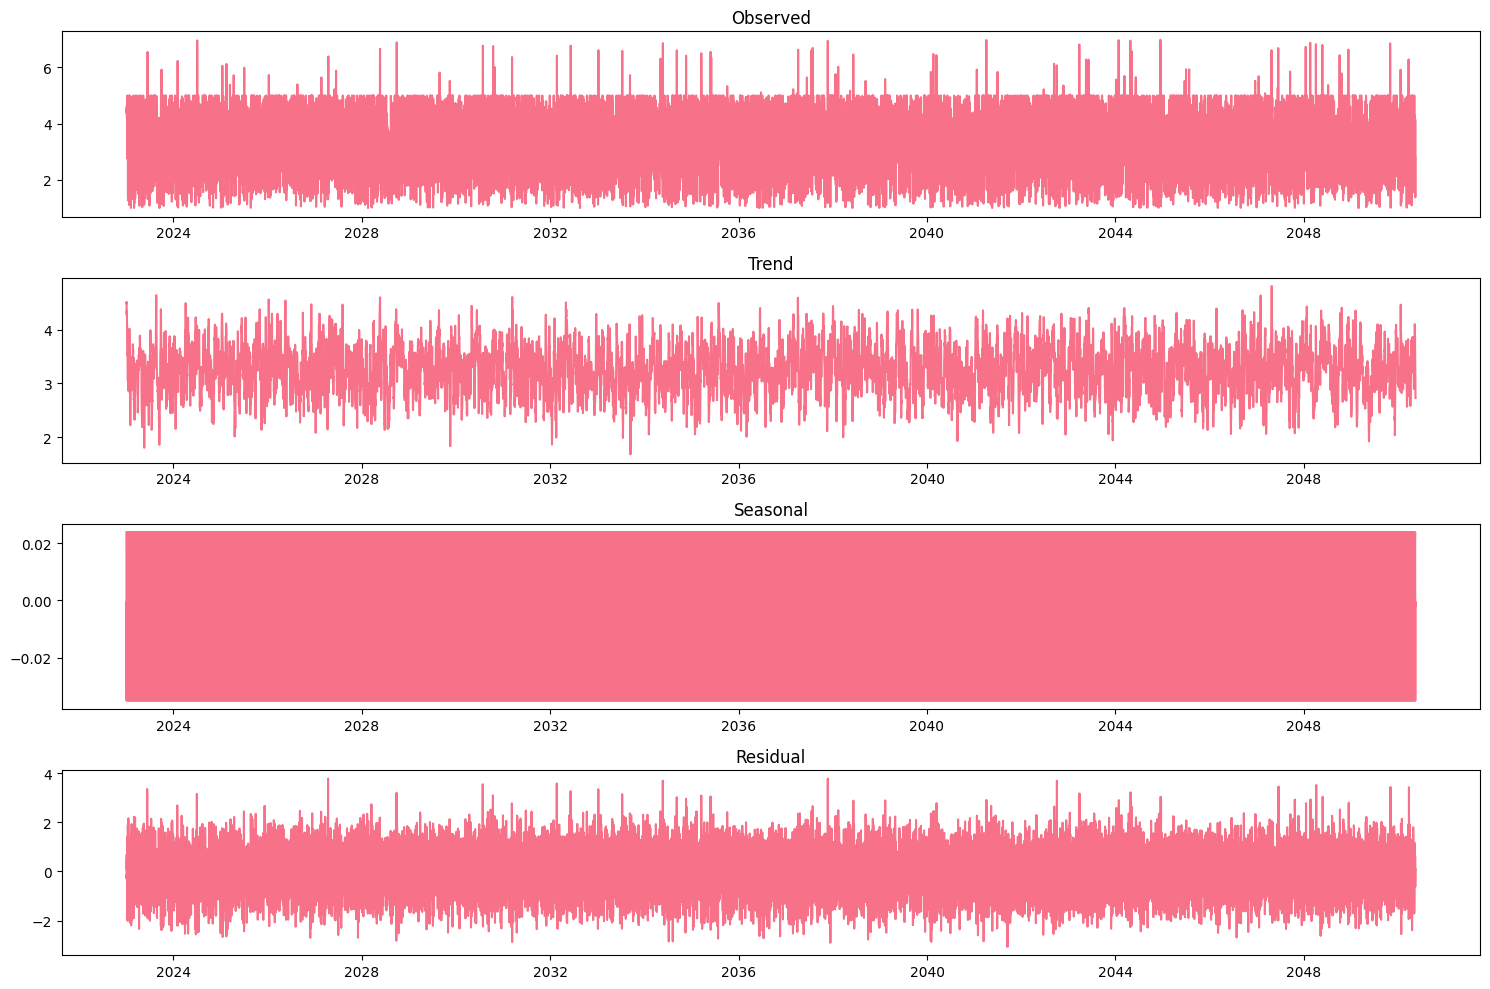

In [11]:
## 2.4 Time Series Analysis

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Analyze trends over time
def analyze_time_trends(data, metric):
    """Analyze trends of metrics over time"""
    plt.figure(figsize=(15, 5))
    
    # Daily average
    daily_avg = data.groupby('Date')[metric].mean().fillna(method='ffill')
    
    # Plot trend
    plt.subplot(1, 2, 1)
    daily_avg.plot()
    plt.title(f'Daily Average {metric} Over Time')
    plt.xticks(rotation=45)
    
    # Plot rolling average
    plt.subplot(1, 2, 2)
    daily_avg.rolling(window=7).mean().plot()
    plt.title(f'7-Day Rolling Average of {metric}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Seasonal decomposition if enough data
    if len(daily_avg) > 14:  # Need at least 2 periods for seasonal decomposition
        from statsmodels.tsa.seasonal import seasonal_decompose
        decomposition = seasonal_decompose(daily_avg.fillna(method='ffill'), period=7)
        
        plt.figure(figsize=(15, 10))
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title('Observed')
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.title('Trend')
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.title('Seasonal')
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.title('Residual')
        plt.tight_layout()
        plt.show()

# Analyze time trends for key metrics
for metric in ['Profit', 'Revenue', 'Customer_Satisfaction']:
    analyze_time_trends(df, metric)


**Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def preprocess(data, target_column):
   
    # Step 1: Handle Missing Values
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = data.select_dtypes(include=['object']).columns

    # Impute numerical columns with mean
    num_imputer = SimpleImputer(strategy='mean')
    data[num_cols] = num_imputer.fit_transform(data[num_cols])

    # Impute categorical columns with mode
    cat_imputer = SimpleImputer(strategy='most_frequent')
    data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

    # Step 2: Feature Engineering
    if 'Date' in data.columns:
        data['Year'] = pd.to_datetime(data['Date']).dt.year
        data['Month'] = pd.to_datetime(data['Date']).dt.month
        data['Day'] = pd.to_datetime(data['Date']).dt.day
        data['Day_of_Week'] = pd.to_datetime(data['Date']).dt.dayofweek
        data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
        data = data.drop(columns=['Date'])

    # Interaction features
    if 'Total_Sales' in data.columns and 'Marketing_Spend' in data.columns:
        data['Sales_to_Marketing_Ratio'] = data['Total_Sales'] / (data['Marketing_Spend'] + 1e-5)
    if 'Revenue' in data.columns and 'Operating_Costs' in data.columns:
        data['Revenue_to_Cost_Ratio'] = data['Revenue'] / (data['Operating_Costs'] + 1e-5)
    if 'Profit' in data.columns and 'Revenue' in data.columns:
        data['Profit_Margin'] = (data['Profit'] / (data['Revenue'] + 1e-5)) * 100
    if 'Revenue' in data.columns and 'Customer_Footfall' in data.columns:
        data['Average_Revenue_per_Customer'] = data['Revenue'] / (data['Customer_Footfall'] + 1e-5)

    # Drop 'Revenue' due to high correlation with 'Profit'
    if 'Revenue' in data.columns:
        data = data.drop(columns=['Revenue'])

    # Step 3: Encode Categorical Variables
    cat_cols = [col for col in cat_cols if col in data.columns]  # Filter out dropped columns
    data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

    # Step 4: Handle Outliers
    def cap_outliers(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return col.clip(lower=lower_bound, upper=upper_bound)

    for col in num_cols:
        if col in data.columns and col != target_column:
            data[col] = cap_outliers(data[col])

    # Step 5: Scale Numerical Features
    num_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop(target_column)
    scaler = MinMaxScaler()
    data[num_cols] = scaler.fit_transform(data[num_cols])

    return data


In [32]:
preprocessed_data = preprocess(df, target_column='Profit')
X = preprocessed_data.drop(columns=['Profit'])
y = preprocessed_data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("Shape of Training Data:", X_train.shape)
print("Shape of Test Data:", X_test.shape)
print("\nSample Training Data:")
print(X_train.head())


Shape of Training Data: (8000, 86)
Shape of Test Data: (2000, 86)

Sample Training Data:
      Staff_Count  Customer_Footfall  Total_Sales  Operating_Costs  \
9254     0.501518           0.798203     0.502917         0.319619   
1561     0.750000           0.253628     0.779542         0.004846   
1670     0.750000           0.460052     0.233239         0.446698   
6087     0.772727           0.460052     0.008901         0.537761   
6669     0.409091           0.409122     0.631842         0.054432   

      Marketing_Spend  Customer_Satisfaction  Employee_Satisfaction  \
9254         0.355306               0.193495               0.526784   
1561         0.565126               0.310706               0.466127   
1670         0.503218               0.100722               0.303937   
6087         0.440063               0.457945               0.410670   
6669         0.512826               0.415832               0.094081   

      Inventory_Value  Number_of_Transactions  Average_Transact

**Model Training**


Training Linear Regression...

Training Ridge...

Training Lasso...

Training ElasticNet...

Training Random Forest...



Training Gradient Boosting...

Training XGBoost...

Training SVR...

Training AdaBoost...

Model Performance Comparison:
                      Train_RMSE      Train_MAE  Train_R2  Train_EV_Score  \
XGBoost              5260.318316    3889.117122  0.999716    9.997158e-01   
Random Forest        8520.842319    3689.913243  0.999254    9.992545e-01   
Gradient Boosting   31004.823665   17676.916641  0.990127    9.901268e-01   
AdaBoost            77405.459908   64206.309590  0.938462    9.384661e-01   
Ridge              108821.052847   55451.858217  0.878374    8.783739e-01   
Lasso              108802.574455   55646.420038  0.878415    8.784152e-01   
Linear Regression  108802.136171   55661.381531  0.878416    8.784162e-01   
ElasticNet         273734.487666  224364.292141  0.230409    2.304090e-01   
SVR                312039.739041  254341.414218 -0.000048    1.623033e-09   

                       Test_RMSE       Test_MAE   Test_R2  Test_EV_Score  
XGBoost             25138.707326

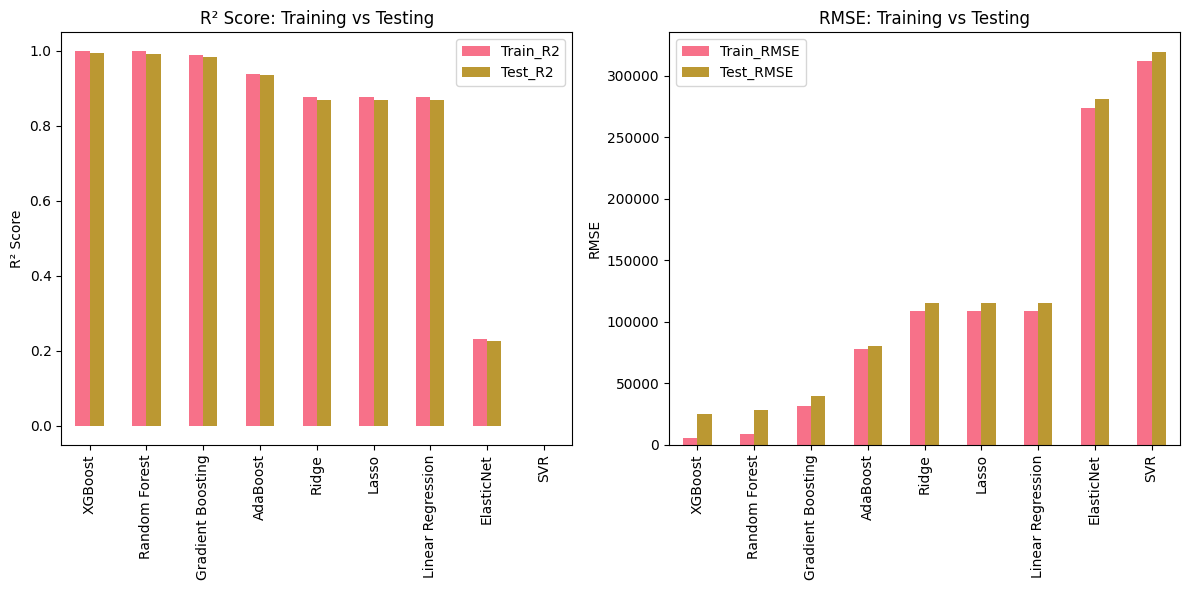

In [47]:
def build_and_evaluate_models(X, y):
    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'SVR': SVR(kernel='rbf'),
        'AdaBoost': AdaBoostRegressor(random_state=42)
    }
    
    # Dictionary to store results
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate training metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        train_ev_score = explained_variance_score(y_train, y_train_pred)
        
        # Calculate testing metrics
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        test_ev_score = explained_variance_score(y_test, y_test_pred)
        
        results[name] = {
            # Training Metrics
            'Train_RMSE': train_rmse,
            'Train_MAE': train_mae,
            'Train_R2': train_r2,
            'Train_EV_Score': train_ev_score,
            
            # Testing Metrics
            'Test_RMSE': test_rmse,
            'Test_MAE': test_mae,
            'Test_R2': test_r2,
            'Test_EV_Score': test_ev_score,
            
            'Model': model
        }
    
    return results, X_train, X_test, y_train, y_test

def compare_models(results):
    # Create comparison dataframe
    metrics_df = pd.DataFrame({
        name: {
            # Training Metrics
            'Train_RMSE': results[name]['Train_RMSE'],
            'Train_MAE': results[name]['Train_MAE'],
            'Train_R2': results[name]['Train_R2'],
            'Train_EV_Score': results[name]['Train_EV_Score'],
            
            # Testing Metrics
            'Test_RMSE': results[name]['Test_RMSE'],
            'Test_MAE': results[name]['Test_MAE'],
            'Test_R2': results[name]['Test_R2'],
            'Test_EV_Score': results[name]['Test_EV_Score']
        } for name in results.keys()
    }).T
    
    # Sort models by Test R²
    metrics_df = metrics_df.sort_values(by='Test_R2', ascending=False)
    
    # Display comparison table
    print("\nModel Performance Comparison:")
    print(metrics_df)
    
    return metrics_df

def analyze_feature_importance(model, feature_cols):
    if hasattr(model, 'feature_importances_'):
        # Create feature importance DataFrame
        importance = pd.DataFrame({
            'feature': feature_cols,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\nTop 10 Most Important Features:")
        print(importance.head(10))
        
        return importance
    else:
        print("This model does not support feature importance analysis.")
        return None

# Main execution workflow
# Assuming X_train, X_test, y_train, y_test are already prepared

# Train and evaluate models
results, X_train, X_test, y_train, y_test = build_and_evaluate_models(X, y)

# Compare models
metrics_comparison = compare_models(results)

# Select the best model based on Test R² score
best_model_name = metrics_comparison.index[0]
best_model = results[best_model_name]['Model']

# Feature Importance Analysis for Best Model
if hasattr(best_model, 'feature_importances_'):
    feature_importance = analyze_feature_importance(best_model, X.columns)

# Print final performance metrics for best model
final_test_predictions = best_model.predict(X_test)
final_test_r2 = r2_score(y_test, final_test_predictions)
final_test_rmse = np.sqrt(mean_squared_error(y_test, final_test_predictions))

print(f"\nFinal Model Performance ({best_model_name}):")
print(f"Test R² Score: {final_test_r2:.4f}")
print(f"Test RMSE: {final_test_rmse:.2f}")

# Visual comparison of training vs testing performance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
metrics_comparison[['Train_R2', 'Test_R2']].plot(kind='bar', ax=plt.gca())
plt.title('R² Score: Training vs Testing')
plt.ylabel('R² Score')
plt.tight_layout()

plt.subplot(1, 2, 2)
metrics_comparison[['Train_RMSE', 'Test_RMSE']].plot(kind='bar', ax=plt.gca())
plt.title('RMSE: Training vs Testing')
plt.ylabel('RMSE')
plt.tight_layout()

plt.show()

*Evaluation and comparison**

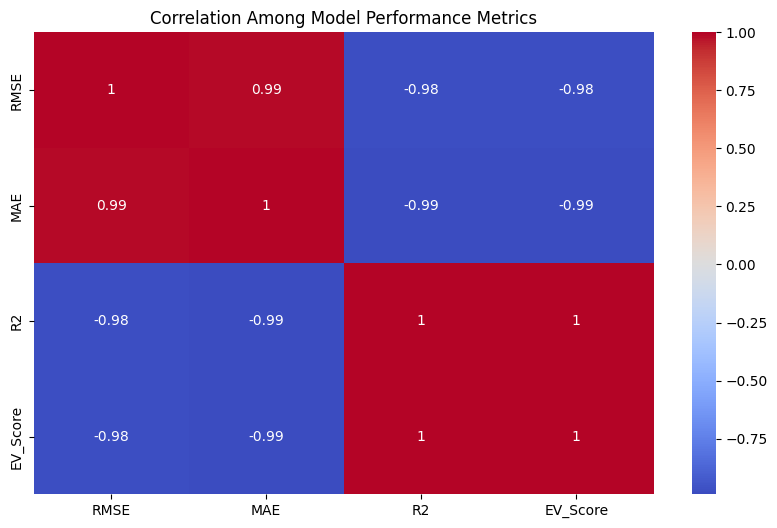

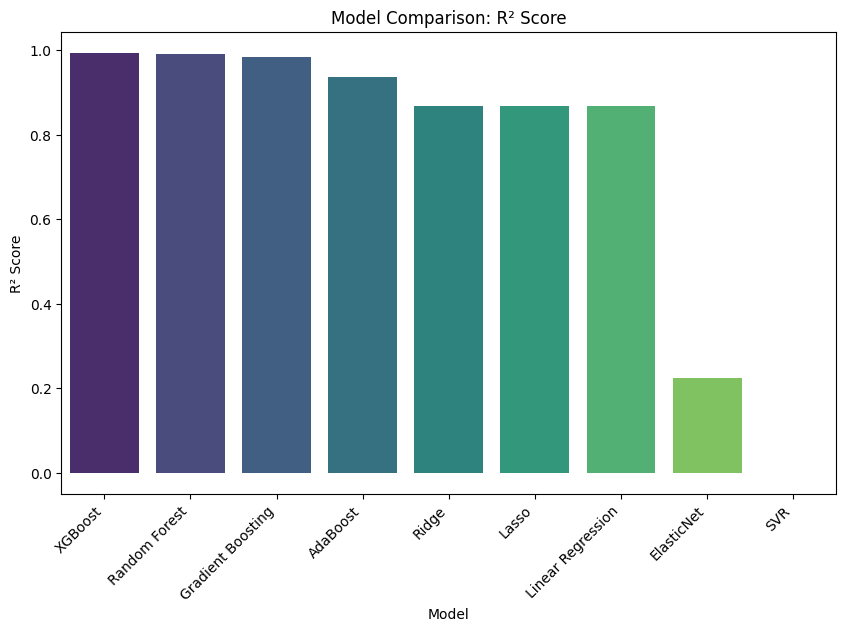

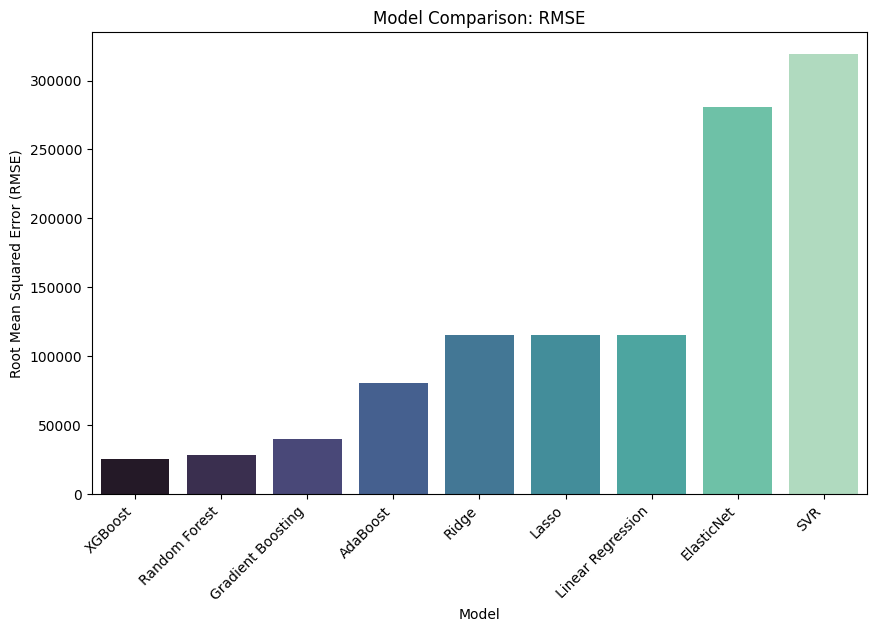


Top 10 Most Important Features:
                         feature  importance
20                 Profit_Margin    0.791447
2                    Total_Sales    0.122384
19         Revenue_to_Cost_Ratio    0.024791
3                Operating_Costs    0.016849
18      Sales_to_Marketing_Ratio    0.006273
21  Average_Revenue_per_Customer    0.005867
54              Branch_ID_BR_034    0.002978
25              Branch_ID_BR_005    0.002936
4                Marketing_Spend    0.001649
69              Branch_ID_BR_049    0.001111


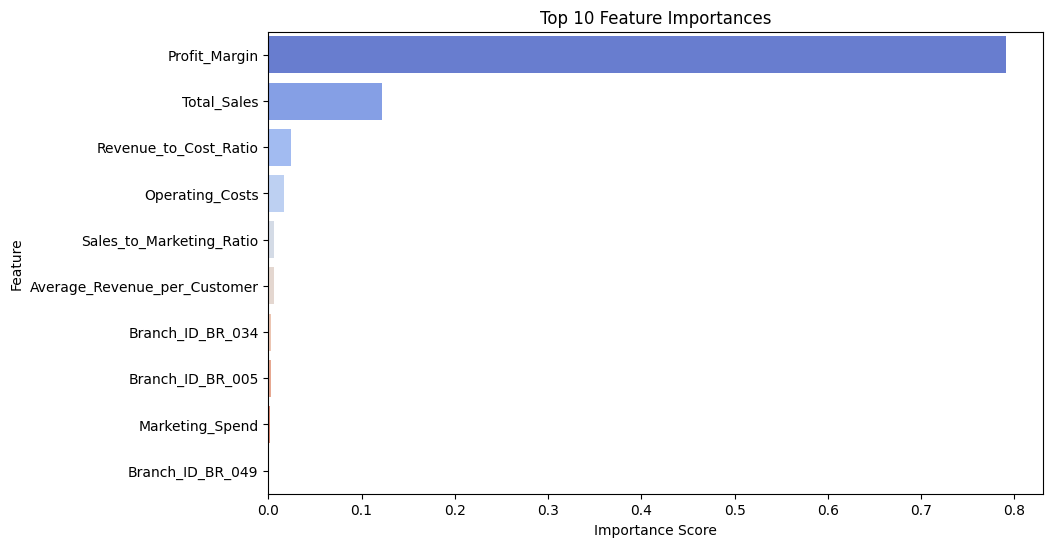

In [40]:
def compare_models_with_visuals(metrics_df):
    # Display heatmap for correlation among metrics
    plt.figure(figsize=(10, 6))
    sns.heatmap(metrics_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Among Model Performance Metrics')
    plt.show()

    # Bar plot for R² scores
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y='R2', data=metrics_df.reset_index(), palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title('Model Comparison: R² Score')
    plt.ylabel('R² Score')
    plt.xlabel('Model')
    plt.show()

    # Bar plot for RMSE values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y='RMSE', data=metrics_df.reset_index(), palette='mako')
    plt.xticks(rotation=45, ha='right')
    plt.title('Model Comparison: RMSE')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.xlabel('Model')
    plt.show()

# Visualize Metrics Comparison

compare_models_with_visuals(metrics_comparison)

# 6. Feature Importance Analysis
def plot_feature_importance(importance_df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='coolwarm')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

# Feature Importance Analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = analyze_feature_importance(best_model, X.columns)
    plot_feature_importance(feature_importance)

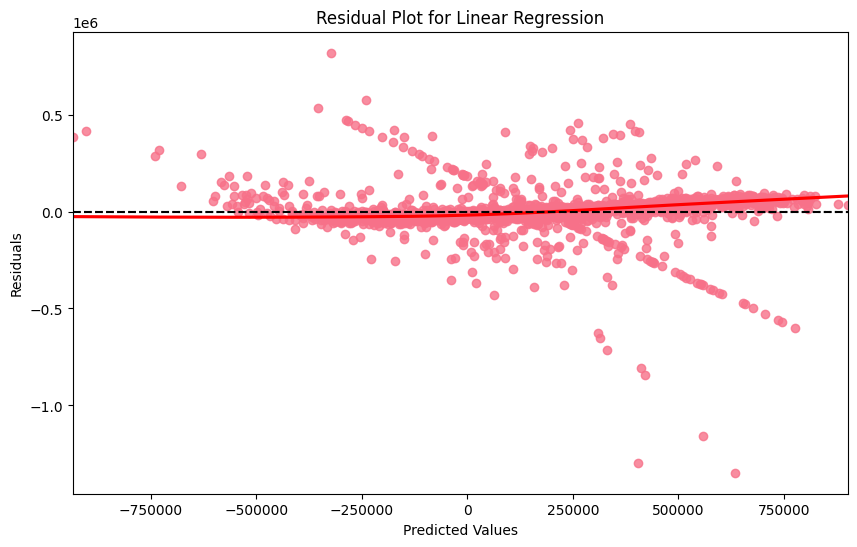

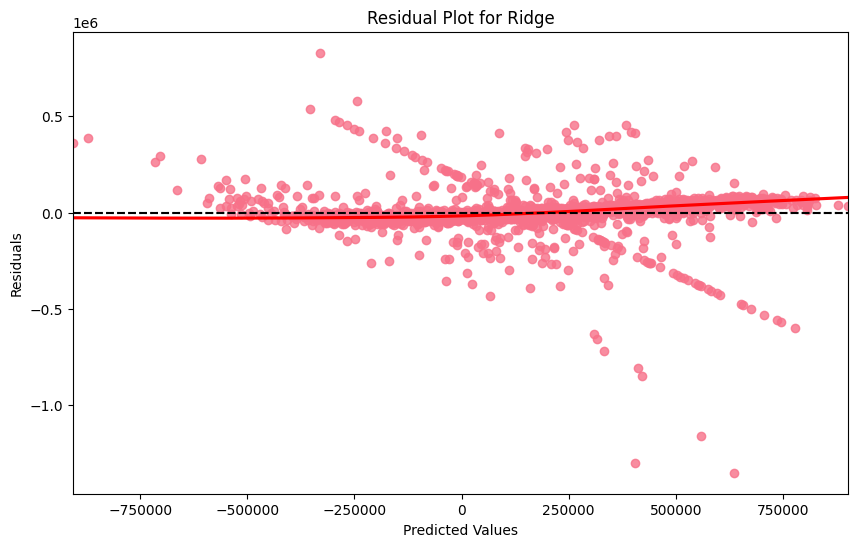

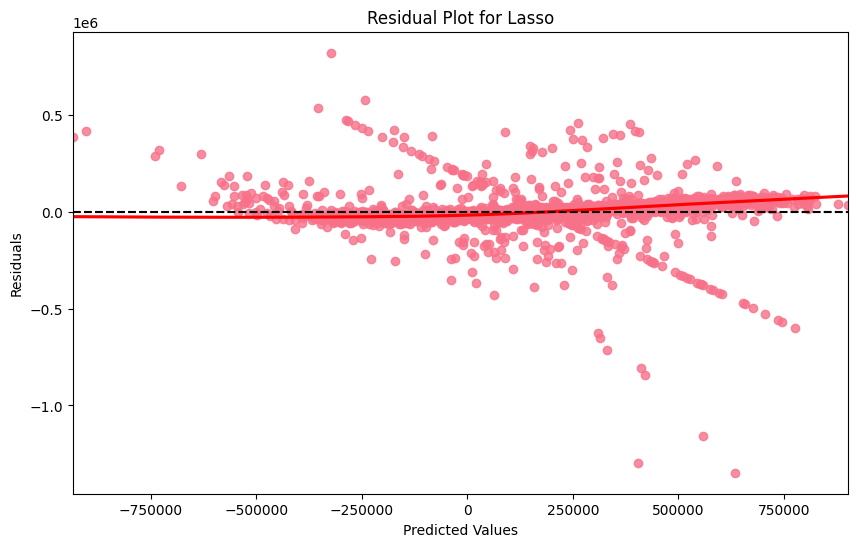

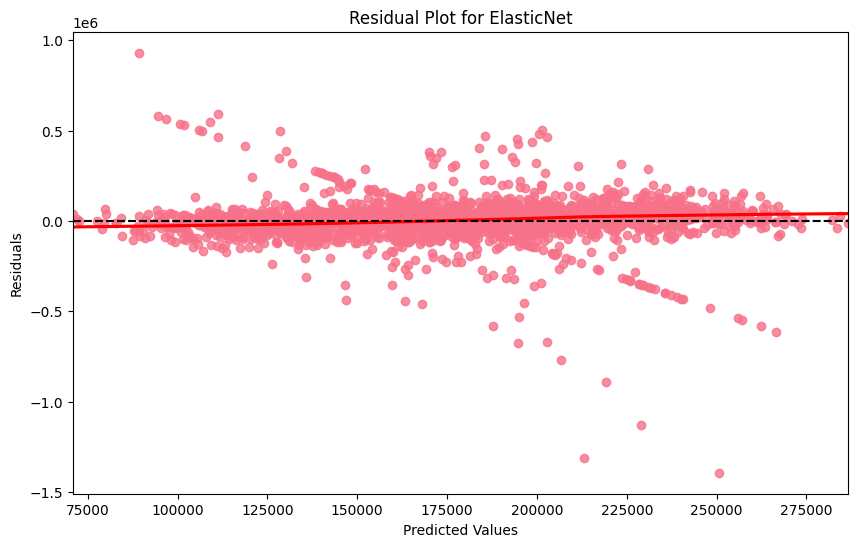

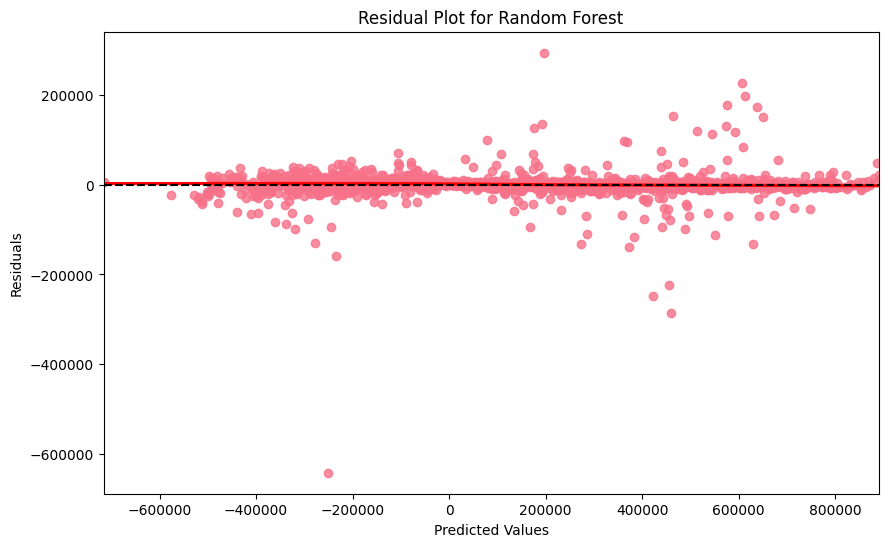

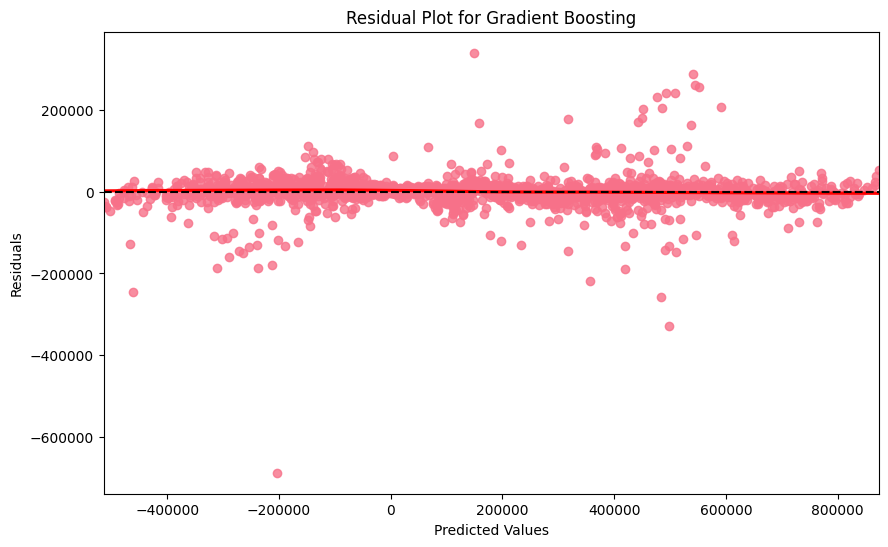

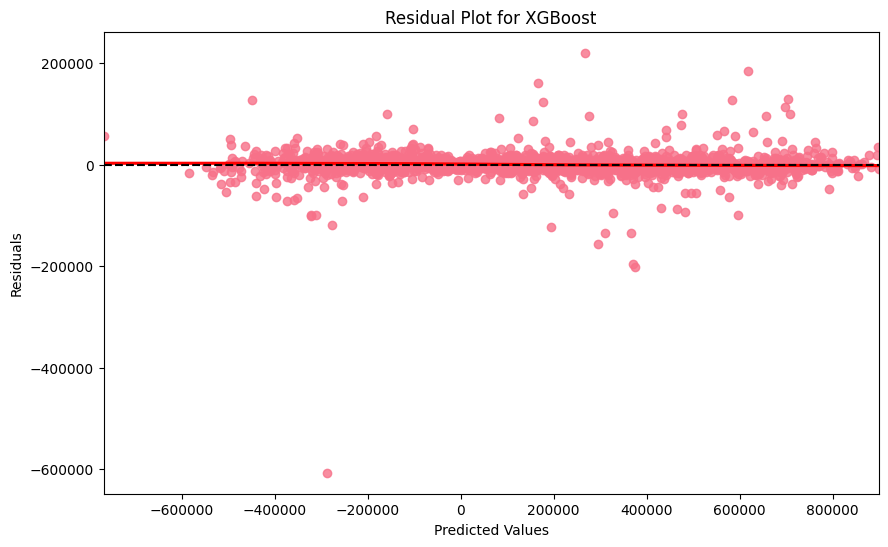

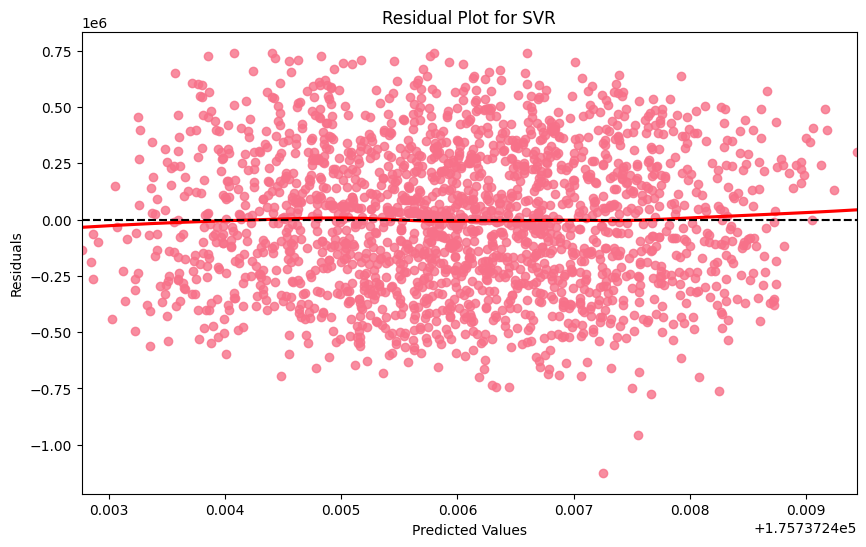

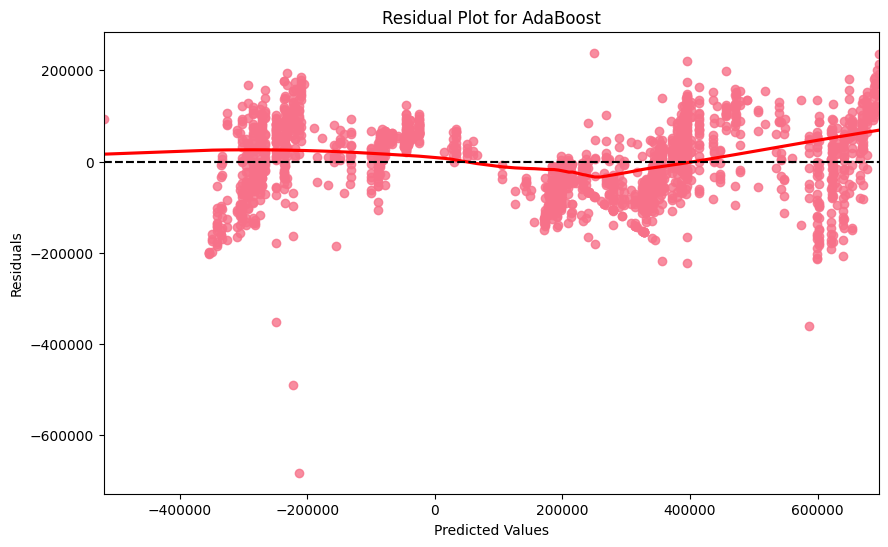

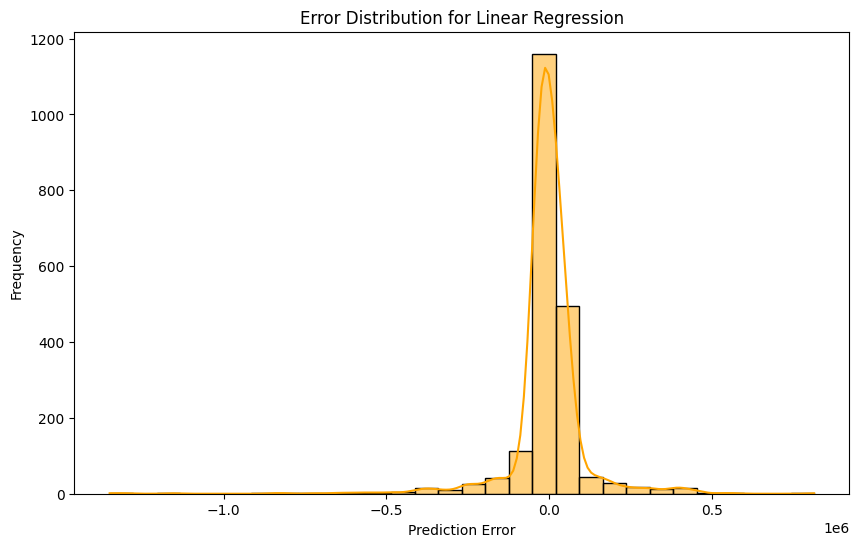

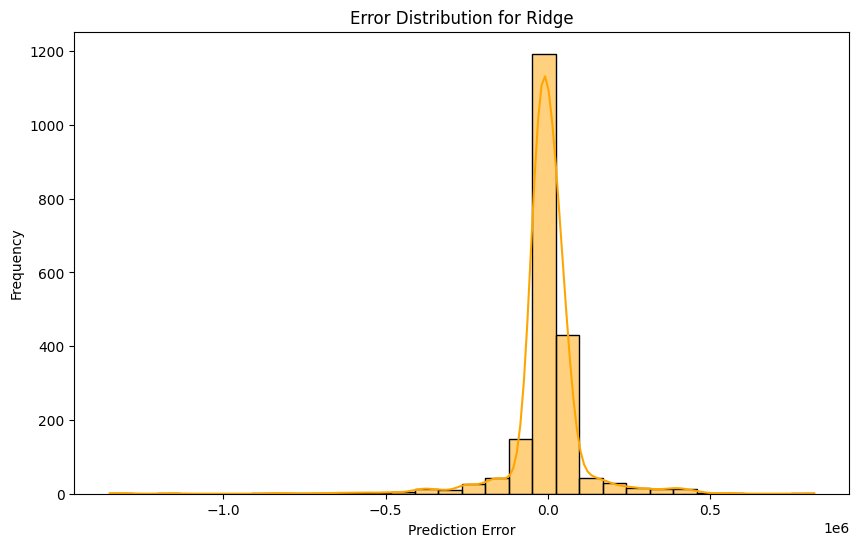

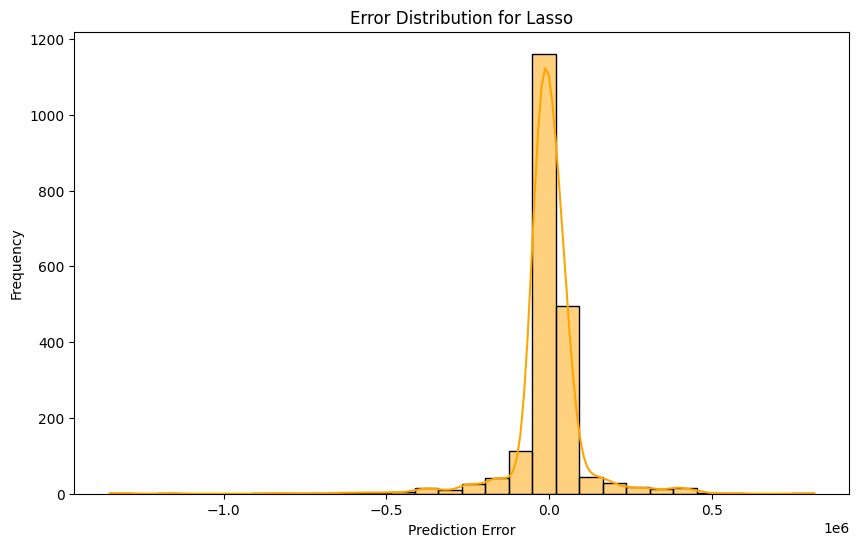

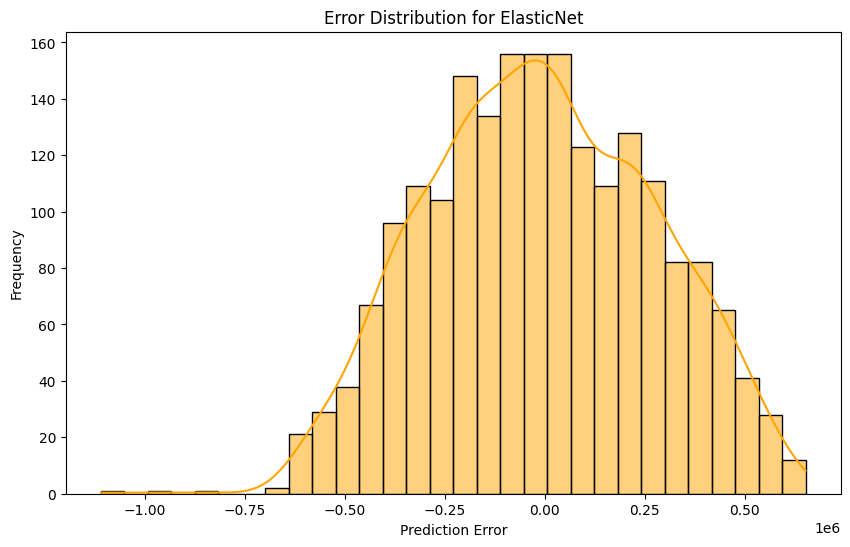

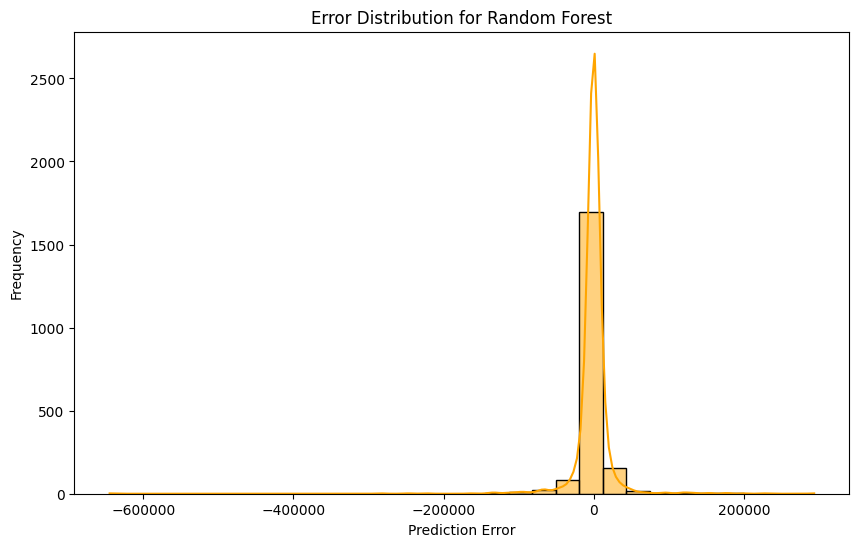

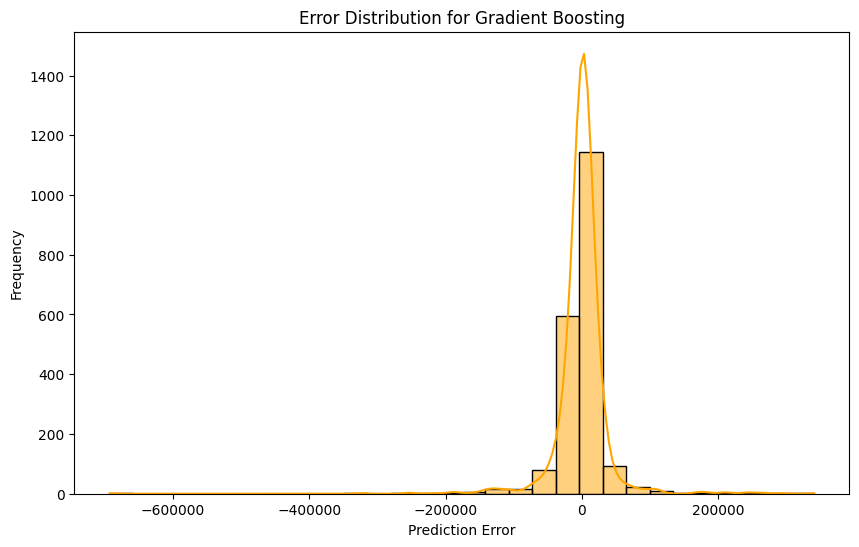

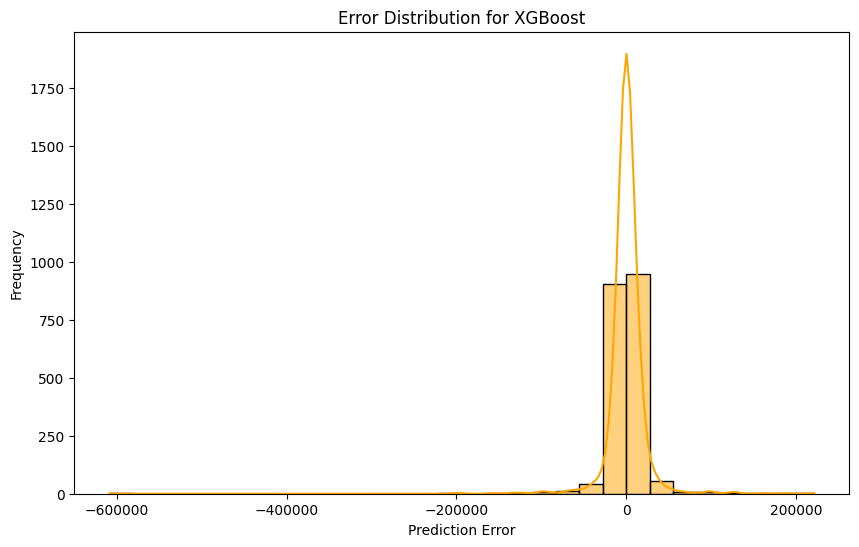

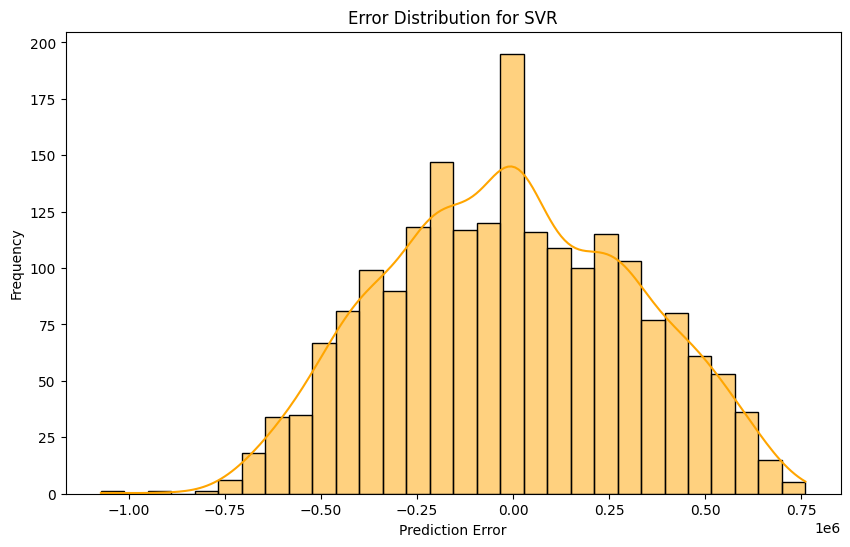

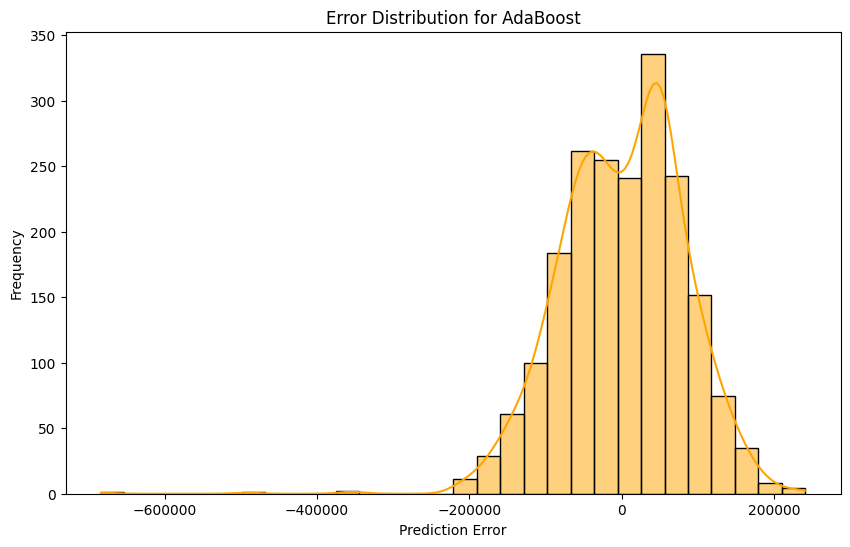

In [41]:
# Residual Plot for All Models
def plot_residuals_all_models(models_results, X_test, y_test):
    for model_name, result in models_results.items():
        model = result['Model']
        predictions = model.predict(X_test)
        residuals = y_test - predictions
        
        plt.figure(figsize=(10, 6))
        sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
        plt.title(f'Residual Plot for {model_name}')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.axhline(0, color='black', linestyle='--')
        plt.show()

# Error Distribution Plot for All Models
def plot_error_distribution_all_models(models_results, X_test, y_test):
    for model_name, result in models_results.items():
        model = result['Model']
        predictions = model.predict(X_test)
        errors = y_test - predictions
        
        plt.figure(figsize=(10, 6))
        sns.histplot(errors, kde=True, bins=30, color='orange')
        plt.title(f'Error Distribution for {model_name}')
        plt.xlabel('Prediction Error')
        plt.ylabel('Frequency')
        plt.show()

# Generate Residual and Error Distribution Plots for All Models
plot_residuals_all_models(results, X_test, y_test)
plot_error_distribution_all_models(results, X_test, y_test)


In [42]:
# Final Recommendations
print("\nRecommendations for Performance Improvement:")
if hasattr(best_model, 'feature_importances_'):
    print("1. Focus on key drivers of profitability:")
    for idx, row in feature_importance.head(5).iterrows():
        print(f"   - {row['feature']}: {row['importance']:.4f}")
else:
    print("1. Feature importance analysis is not available for this model.")


Recommendations for Performance Improvement:
1. Focus on key drivers of profitability:
   - Profit_Margin: 0.7914
   - Total_Sales: 0.1224
   - Revenue_to_Cost_Ratio: 0.0248
   - Operating_Costs: 0.0168
   - Sales_to_Marketing_Ratio: 0.0063
